# Import packages

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import seaborn as sns
from shapely.ops import unary_union
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use("ggplot")
from sklearn.decomposition import PCA
from sklearn import decomposition
from scipy import stats
from scipy.stats import zscore

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import RobustScaler


import os

# Select the ascent neiborhood

In [9]:
original_identified_neiborhood_data_2011_2021 = pd.read_csv("data/identified_neiborhood_data_2011_2021.csv")
ascent_data = pd.read_csv("data/Output/pca/final_result_ascent.csv")

In [10]:
print(list(original_identified_neiborhood_data_2011_2021.columns))

['Unnamed: 0', 'LSOA21CD', 'geography_2021', 'geography_code_2021', 'teenager_2021', 'young_people_2021', 'middle_aged_people_2021', 'older_middle_aged_people_2021', 'old_age_2021', 'All_usual_residents_2021', 'Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021', 'Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021', 'Ethnic_group_White_2021', 'Ethnic_group_Other_ethnic_group_2021', 'One_person_household_Aged_65_and_over_2021', 'One_person_household_Other_2021', 'One_family_only_All_aged_65_and_over_2021', 'household_no_children_2021', 'household_dependent_children_2021', 'household_non_dependent_children_2021', 'One_family_only_Lone_parent_Dependent_children_2021', 'One_family_only_Lone_parent_All_children_non-dependent_2021', 'Other_household_types_With_dependent_children_2021', 'Other_household_types_all_full_time_students_and_all_aged_66_years_and_over_2021', 'All_Household_composition_2021', 'Resident_in_UK_4_and_Less_2021', 'Resident_in_UK_5_and_more_2021', '

In [11]:
len(ascent_data)

1206

In [12]:
# Extract all LSOA21CD to list file
ascent_data_LSOA21CD = ascent_data["LSOA21CD"].tolist()


In [13]:
# seelce the rows which LSOA21CD is in the list
select_identified_neiborhood_data_2011_2021 = original_identified_neiborhood_data_2011_2021.copy()
select_identified_neiborhood_data_2011_2021 = select_identified_neiborhood_data_2011_2021[select_identified_neiborhood_data_2011_2021["LSOA21CD"].isin(ascent_data_LSOA21CD)]
select_identified_neiborhood_data_2011_2021


,Unnamed: 0,LSOA21CD,geography_2021,geography_code_2021,teenager_2021,young_people_2021,middle_aged_people_2021,older_middle_aged_people_2021,old_age_2021,All_usual_residents_2021,...,No_cars_or_vans_in_household_2011_pct,1_car_or_van_in_household_2011_pct,2_cars_or_vans_in_household_2011_pct,3_or_more_cars_or_vans_in_household_2011_pct,Central_Heating_Does_have_central_heating_2011_pct,household_aged_65_and_over_2011_pct,Conversion_2011_2018,New_build_2011_2018,Conversion_2011_2018_pct,New_build_2011_2018_pct
1,1,E01000002,City of London 001B,E01000002,110,100,502,395,277,1384,...,57.95,35.30,4.58,2.17,98.19,19.40,361,1988,0.165370,0.067093
2,2,E01000003,City of London 001C,E01000003,127,96,608,497,285,1613,...,80.17,18.12,1.35,0.37,97.18,23.01,296,0,0.135594,0.000000
44,44,E01000051,Barking and Dagenham 021D,E01000051,365,45,511,161,26,1108,...,60.69,35.03,3.72,0.55,96.69,2.90,0,0,0.000000,0.000000
116,116,E01000126,Barnet 026A,E01000126,592,202,669,660,148,2271,...,35.95,45.73,14.60,3.72,96.69,7.71,1,2,0.000458,0.000068
129,129,E01000139,Barnet 041B,E01000139,289,81,429,363,225,1387,...,32.32,38.21,21.25,8.21,97.14,16.25,14,4,0.006413,0.000135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,4979,E01035708,Camden 022F,E01035708,458,393,746,266,85,1948,...,73.16,22.74,3.53,0.56,98.31,20.20,0,6909,0.000000,0.233172
4984,4984,E01035713,Kensington and Chelsea 016F,E01035713,344,221,641,518,273,1997,...,49.73,37.53,9.87,2.87,93.94,13.13,129,18,0.059094,0.000607
4985,4985,E01035714,Kensington and Chelsea 020F,E01035714,356,268,583,537,314,2058,...,42.30,39.28,15.90,2.52,97.06,10.77,70,25,0.032066,0.000844
4989,4989,E01035718,Westminster 019G,E01035718,920,400,538,448,262,2568,...,46.39,38.25,11.24,4.12,97.19,14.36,42,13,0.019240,0.000439


# Select the columns for classified neiborhoods

In [14]:
# print the columns name
print(list(select_identified_neiborhood_data_2011_2021.columns))

['Unnamed: 0', 'LSOA21CD', 'geography_2021', 'geography_code_2021', 'teenager_2021', 'young_people_2021', 'middle_aged_people_2021', 'older_middle_aged_people_2021', 'old_age_2021', 'All_usual_residents_2021', 'Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021', 'Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021', 'Ethnic_group_White_2021', 'Ethnic_group_Other_ethnic_group_2021', 'One_person_household_Aged_65_and_over_2021', 'One_person_household_Other_2021', 'One_family_only_All_aged_65_and_over_2021', 'household_no_children_2021', 'household_dependent_children_2021', 'household_non_dependent_children_2021', 'One_family_only_Lone_parent_Dependent_children_2021', 'One_family_only_Lone_parent_All_children_non-dependent_2021', 'Other_household_types_With_dependent_children_2021', 'Other_household_types_all_full_time_students_and_all_aged_66_years_and_over_2021', 'All_Household_composition_2021', 'Resident_in_UK_4_and_Less_2021', 'Resident_in_UK_5_and_more_2021', '

In [15]:
status_variable = select_identified_neiborhood_data_2011_2021["old_age_2011"]

In [16]:
classifed_neibor_original = select_identified_neiborhood_data_2011_2021.copy()
# classifed_neibor_original = classifed_neibor_original.dropna()

In [17]:
for i in range(len(classifed_neibor_original.columns)):
    if '_pct' in classifed_neibor_original.columns[i]:
        print(str(i) + ':' + str(classifed_neibor_original.columns[i]))

114:teenager_2021_pct
115:young_people_2021_pct
116:middle_aged_people_2021_pct
117:older_middle_aged_people_2021_pct
118:old_age_2021_pct
119:Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021_pct
120:Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021_pct
121:Ethnic_group_White_2021_pct
122:Ethnic_group_Other_ethnic_group_2021_pct
123:Resident_in_UK_4_and_Less_2021_pct
124:Resident_in_UK_5_and_more_2021_pct
125:NSSES_1_2021_pct
126:NSSES_2_2021_pct
127:NSSES_3_2021_pct
128:NSSES_4_2021_pct
129:NSSES_5_2021_pct
130:NSSES_6_2021_pct
131:NSSES_7_2021_pct
132:NSSES_8_2021_pct
133:Managers_directors_and_senior_officials_2021_pct
134:Professional_occupations_2021_pct
135:Associate_professional_and_technical_occupations_2021_pct
136:Administrative_and_secretarial_occupations_2021_pct
137:Skilled_trades_occupations_2021_pct
138:Caring_leisure_and_other_service_occupations_2021_pct
139:Sales_and_customer_service_occupations_2021_pct
140:Process_plant_and_machine_operative

In [18]:

classifed_neibor_original_pct = []
classifed_neibor_original_pct.append("LSOA21CD")
for i in range(len(classifed_neibor_original.columns)):
    if '_pct' in classifed_neibor_original.columns[i]:
        classifed_neibor_original_pct.append(classifed_neibor_original.columns[i])

print(classifed_neibor_original_pct)


['LSOA21CD', 'teenager_2021_pct', 'young_people_2021_pct', 'middle_aged_people_2021_pct', 'older_middle_aged_people_2021_pct', 'old_age_2021_pct', 'Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021_pct', 'Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021_pct', 'Ethnic_group_White_2021_pct', 'Ethnic_group_Other_ethnic_group_2021_pct', 'Resident_in_UK_4_and_Less_2021_pct', 'Resident_in_UK_5_and_more_2021_pct', 'NSSES_1_2021_pct', 'NSSES_2_2021_pct', 'NSSES_3_2021_pct', 'NSSES_4_2021_pct', 'NSSES_5_2021_pct', 'NSSES_6_2021_pct', 'NSSES_7_2021_pct', 'NSSES_8_2021_pct', 'Managers_directors_and_senior_officials_2021_pct', 'Professional_occupations_2021_pct', 'Associate_professional_and_technical_occupations_2021_pct', 'Administrative_and_secretarial_occupations_2021_pct', 'Skilled_trades_occupations_2021_pct', 'Caring_leisure_and_other_service_occupations_2021_pct', 'Sales_and_customer_service_occupations_2021_pct', 'Process_plant_and_machine_operatives_2021_pct', 'El

In [19]:
classifed_neibor_select = classifed_neibor_original.loc[:, classifed_neibor_original_pct]
classifed_neibor_select

,LSOA21CD,teenager_2021_pct,young_people_2021_pct,middle_aged_people_2021_pct,older_middle_aged_people_2021_pct,old_age_2021_pct,Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021_pct,Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021_pct,Ethnic_group_White_2021_pct,Ethnic_group_Other_ethnic_group_2021_pct,...,tenure_Private_rented_2011_pct,tenure_Living_rent_free_2011_pct,No_cars_or_vans_in_household_2011_pct,1_car_or_van_in_household_2011_pct,2_cars_or_vans_in_household_2011_pct,3_or_more_cars_or_vans_in_household_2011_pct,Central_Heating_Does_have_central_heating_2011_pct,household_aged_65_and_over_2011_pct,Conversion_2011_2018_pct,New_build_2011_2018_pct
1,E01000002,7.95,7.23,36.27,28.54,20.01,13.08,0.79,78.32,7.95,...,26.39,3.37,57.95,35.30,4.58,2.17,98.19,19.40,0.165370,0.067093
2,E01000003,7.87,5.95,37.69,30.81,17.67,9.49,3.47,74.09,12.90,...,21.66,2.08,80.17,18.12,1.35,0.37,97.18,23.01,0.135594,0.000000
44,E01000051,32.94,4.06,46.12,14.53,2.35,32.85,34.12,23.83,9.21,...,8.41,2.07,60.69,35.03,3.72,0.55,96.69,2.90,0.000000,0.000000
116,E01000126,26.07,8.89,29.46,29.06,6.52,19.99,20.39,37.96,21.97,...,20.66,2.07,35.95,45.73,14.60,3.72,96.69,7.71,0.000458,0.000068
129,E01000139,20.84,5.84,30.93,26.17,16.22,15.14,5.19,64.60,15.14,...,29.82,3.21,32.32,38.21,21.25,8.21,97.14,16.25,0.006413,0.000135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,E01035708,23.51,20.17,38.30,13.66,4.36,31.93,11.76,41.43,15.09,...,15.40,1.41,73.16,22.74,3.53,0.56,98.31,20.20,0.000000,0.233172
4984,E01035713,17.23,11.07,32.10,25.94,13.67,13.92,1.50,74.31,10.27,...,49.96,4.12,49.73,37.53,9.87,2.87,93.94,13.13,0.059094,0.000607
4985,E01035714,17.30,13.02,28.33,26.09,15.26,9.72,1.55,77.60,11.27,...,39.95,4.96,42.30,39.28,15.90,2.52,97.06,10.77,0.032066,0.000844
4989,E01035718,35.83,15.58,20.95,17.45,10.20,20.95,2.22,62.11,14.64,...,36.45,8.33,46.39,38.25,11.24,4.12,97.19,14.36,0.019240,0.000439


In [20]:
for i in range(len(classifed_neibor_select.columns)):

    print(str(i) + ':' + str(classifed_neibor_select.columns[i]))


0:LSOA21CD
1:teenager_2021_pct
2:young_people_2021_pct
3:middle_aged_people_2021_pct
4:older_middle_aged_people_2021_pct
5:old_age_2021_pct
6:Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021_pct
7:Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021_pct
8:Ethnic_group_White_2021_pct
9:Ethnic_group_Other_ethnic_group_2021_pct
10:Resident_in_UK_4_and_Less_2021_pct
11:Resident_in_UK_5_and_more_2021_pct
12:NSSES_1_2021_pct
13:NSSES_2_2021_pct
14:NSSES_3_2021_pct
15:NSSES_4_2021_pct
16:NSSES_5_2021_pct
17:NSSES_6_2021_pct
18:NSSES_7_2021_pct
19:NSSES_8_2021_pct
20:Managers_directors_and_senior_officials_2021_pct
21:Professional_occupations_2021_pct
22:Associate_professional_and_technical_occupations_2021_pct
23:Administrative_and_secretarial_occupations_2021_pct
24:Skilled_trades_occupations_2021_pct
25:Caring_leisure_and_other_service_occupations_2021_pct
26:Sales_and_customer_service_occupations_2021_pct
27:Process_plant_and_machine_operatives_2021_pct
28:Elementary_

## Calculate change rate

In [21]:
classifed_neibor_change = classifed_neibor_select.copy()

In [22]:
classifed_neibor_change["household_more_65_2021_pct"] =  classifed_neibor_change["One_person_household_Aged_65_and_over_2021_pct"] + classifed_neibor_change["One_family_only_All_aged_65_and_over_2021_pct"]
classifed_neibor_change["household_more_65_2011_pct"] =  classifed_neibor_change["One_person_household_Aged_65_and_over_2011_pct"] + classifed_neibor_change["One_family_only_All_aged_65_and_over_2011_pct"]
classifed_neibor_change["middle_under_65_2021_pct"] =  classifed_neibor_change["middle_aged_people_2021_pct"] + classifed_neibor_change["older_middle_aged_people_2021_pct"]
classifed_neibor_change["middle_under_65_2011_pct"] =  classifed_neibor_change["middle_aged_people_2011_pct"] + classifed_neibor_change["older_middle_aged_people_2011_pct"]
classifed_neibor_change["all_household_dependent_children_2021_pct"] = classifed_neibor_change["household_dependent_children_2021_pct"] + classifed_neibor_change["One_family_only_Lone_parent_Dependent_children_2021_pct"]
classifed_neibor_change["all_household_dependent_children_2011_pct"] = classifed_neibor_change["household_dependent_children_2011_pct"] + classifed_neibor_change["One_family_only_Lone_parent_Dependent_children_2011_pct"]
classifed_neibor_change["all_household_non_dependent_children_2021_pct"] = classifed_neibor_change["household_non_dependent_children_2021_pct"] + classifed_neibor_change["One_family_only_Lone_parent_All_children_non-dependent_2021_pct"]
classifed_neibor_change["all_household_non_dependent_children_2011_pct"] = classifed_neibor_change["household_non_dependent_children_2011_pct"] + classifed_neibor_change["One_family_only_Lone_parent_All_children_non-dependent_2011_pct"]

In [23]:
classifed_neibor_change["housing_price_change_pct"] = (select_identified_neiborhood_data_2011_2021["mediam_price_2021"]-  select_identified_neiborhood_data_2011_2021["mediam_price_2011"])/select_identified_neiborhood_data_2011_2021["mediam_price_2011"]
classifed_neibor_change["housing_mediam_price_change_pct"] = (select_identified_neiborhood_data_2011_2021["compared_mean_price_2021"] - select_identified_neiborhood_data_2011_2021["compared_mean_price_2011"]) / select_identified_neiborhood_data_2011_2021["compared_mean_price_2011"]
classifed_neibor_change["young_people_change_pct"] = classifed_neibor_change["young_people_2021_pct"] - classifed_neibor_change["young_people_2011_pct"]
classifed_neibor_change["middle_aged_people_change_pct"] = classifed_neibor_change["middle_aged_people_2021_pct"] - classifed_neibor_change["middle_aged_people_2011_pct"]
classifed_neibor_change["more_65_people_change_pct"] = classifed_neibor_change["old_age_2021_pct"] - classifed_neibor_change["old_age_2011_pct"]
classifed_neibor_change["older_middle_aged_people_change_pct"] = classifed_neibor_change["older_middle_aged_people_2021_pct"] - classifed_neibor_change["older_middle_aged_people_2011_pct"]
classifed_neibor_change["household_more_65_change_pct"] = classifed_neibor_change["household_more_65_2021_pct"] - classifed_neibor_change["household_more_65_2011_pct"]
classifed_neibor_change["household_no_children_change_pct"] = classifed_neibor_change["household_no_children_2021_pct"] - classifed_neibor_change["household_no_children_2011_pct"]
classifed_neibor_change["household_dependent_children_change_pct"] = classifed_neibor_change["household_dependent_children_2021_pct"] - classifed_neibor_change["household_dependent_children_2011_pct"]
classifed_neibor_change["household_non_dependent_children_change_pct"] = classifed_neibor_change["household_non_dependent_children_2021_pct"] - classifed_neibor_change["household_non_dependent_children_2011_pct"]
classifed_neibor_change["lone_parent_dependent_children_change_pct"] = classifed_neibor_change["One_family_only_Lone_parent_Dependent_children_2021_pct"] - classifed_neibor_change["One_family_only_Lone_parent_Dependent_children_2011_pct"]
classifed_neibor_change["lone_parent_non_dependent_children_change_pct"] = classifed_neibor_change["One_family_only_Lone_parent_All_children_non-dependent_2021_pct"] - classifed_neibor_change["One_family_only_Lone_parent_All_children_non-dependent_2011_pct"]
classifed_neibor_change["middle_under_65_change_pct"] = classifed_neibor_change["middle_under_65_2021_pct"] - classifed_neibor_change["middle_under_65_2011_pct"]
classifed_neibor_change["all_household_dependent_children_change_pct"] = classifed_neibor_change["all_household_dependent_children_2021_pct"] - classifed_neibor_change["all_household_dependent_children_2011_pct"]
classifed_neibor_change["all_household_non_dependent_children_change_pct"] = classifed_neibor_change["all_household_non_dependent_children_2021_pct"] - classifed_neibor_change["all_household_non_dependent_children_2011_pct"]
classifed_neibor_change["Ethnic_group_White_change_pct"] = classifed_neibor_change["Ethnic_group_White_2021_pct"] - classifed_neibor_change["Ethnic_group_White_2011_pct"]
classifed_neibor_change["Resident_in_UK_4_and_Less_change_pct"] = classifed_neibor_change["Resident_in_UK_4_and_Less_2021_pct"] - classifed_neibor_change["Resident_in_UK_4_and_Less_2011_pct"]
classifed_neibor_change["Resident_in_UK_5_and_more_change_pct"] = classifed_neibor_change["Resident_in_UK_5_and_more_2021_pct"] - classifed_neibor_change["Resident_in_UK_5_and_more_2011_pct"]
classifed_neibor_change["NSSES_1_change_pct"] = classifed_neibor_change["NSSES_1_2021_pct"] - classifed_neibor_change["NSSES_1_2011_pct"]
classifed_neibor_change["NSSES_2_change_pct"] = classifed_neibor_change["NSSES_2_2021_pct"] - classifed_neibor_change["NSSES_2_2011_pct"]
classifed_neibor_change["NSSES_3_change_pct"] = classifed_neibor_change["NSSES_3_2021_pct"] - classifed_neibor_change["NSSES_3_2011_pct"]
classifed_neibor_change["NSSES_4_change_pct"] = classifed_neibor_change["NSSES_4_2021_pct"] - classifed_neibor_change["NSSES_4_2011_pct"]
classifed_neibor_change["NSSES_5_change_pct"] = classifed_neibor_change["NSSES_5_2021_pct"] - classifed_neibor_change["NSSES_5_2011_pct"]
classifed_neibor_change["NSSES_6_change_pct"] = classifed_neibor_change["NSSES_6_2021_pct"] - classifed_neibor_change["NSSES_6_2011_pct"]
classifed_neibor_change["NSSES_7_change_pct"] = classifed_neibor_change["NSSES_7_2021_pct"] - classifed_neibor_change["NSSES_7_2011_pct"]
# classifed_neibor_change["NSSES_8_change_pct"] = classifed_neibor_change["NSSES_8_2021_pct"] - classifed_neibor_change["NSSES_8_2011_pct"]
classifed_neibor_change["sum_NSSES_1_change_pct"] = classifed_neibor_change["sum_NSSES_1_2021_pct"] - classifed_neibor_change["sum_NSSES_1_2011_pct"]
classifed_neibor_change["sum_NSSES_2_change_pct"] = classifed_neibor_change["sum_NSSES_2_2021_pct"] - classifed_neibor_change["sum_NSSES_2_2011_pct"]
classifed_neibor_change["sum_NSSES_3_change_pct"] = classifed_neibor_change["sum_NSSES_3_2021_pct"] - classifed_neibor_change["sum_NSSES_3_2011_pct"]
classifed_neibor_change["sum_NSSES_4_change_pct"] = classifed_neibor_change["sum_NSSES_4_2021_pct"] - classifed_neibor_change["sum_NSSES_4_2011_pct"]
classifed_neibor_change["sum_NSSES_5_change_pct"] = classifed_neibor_change["sum_NSSES_5_2021_pct"] - classifed_neibor_change["sum_NSSES_5_2011_pct"]
classifed_neibor_change["1_car_or_van_in_household_change_pct"] = classifed_neibor_change["1_car_or_van_in_household_2021_pct"] - classifed_neibor_change["1_car_or_van_in_household_2011_pct"]
# classifed_neibor_change["sum_NSSES_6_change_pct"] = classifed_neibor_change["sum_NSSES_6_2021_pct"] - classifed_neibor_change["sum_NSSES_6_2011_pct"]
classifed_neibor_change["religionNo_religion_change_pct"] = classifed_neibor_change["religionNo_religion_2021_pct"] - classifed_neibor_change["religionNo_religion_2011_pct"]
classifed_neibor_change["tenure_social_rented_change_pct"] = classifed_neibor_change["tenure_Social_rented_2021_pct"] - classifed_neibor_change["tenure_Social_rented_2011_pct"]
classifed_neibor_change["tenure_private_rented_change_pct"] = classifed_neibor_change["tenure_Private_rented_2021_pct"] - classifed_neibor_change["tenure_Private_rented_2011_pct"]
classifed_neibor_change["tenure_living_rent_free_change_pct"] = classifed_neibor_change["tenure_Living_rent_free_2021_pct"] - classifed_neibor_change["tenure_Living_rent_free_2011_pct"]
classifed_neibor_change["tenure_owned_change_pct"] = classifed_neibor_change["tenure_Owned_2021_pct"] - classifed_neibor_change["tenure_Owned_2011_pct"]
classifed_neibor_change["Central_Heating_have_central_heating_change_pct"] = classifed_neibor_change["Central_Heating_Does_have_central_heating_2021_pct"] - classifed_neibor_change["Central_Heating_Does_have_central_heating_2011_pct"]
classifed_neibor_change["Work_mainly_at_or_from_home_change_pct"] = classifed_neibor_change["Work_mainly_at_or_from_home_2021_pct"] - classifed_neibor_change["Work_mainly_at_or_from_home_2011_pct"]
classifed_neibor_change["Administrative_and_secretarial_occupations_change_pct"] = classifed_neibor_change["Administrative_and_secretarial_occupations_2021_pct"] - classifed_neibor_change["Administrative_and_secretarial_occupations_2011_pct"]
classifed_neibor_change["professional_occupations_change_pct"] = classifed_neibor_change["Professional_occupations_2021_pct"] - classifed_neibor_change["Professional_occupations_2011_pct"]
classifed_neibor_change["Associate_professional_and_technical_occupations_change_pct"] = classifed_neibor_change["Associate_professional_and_technical_occupations_2021_pct"] - classifed_neibor_change["Associate_professional_and_technical_occupations_2011_pct"] 
classifed_neibor_change["other_higer_occupation_change_pct"] = classifed_neibor_change["Administrative_and_secretarial_occupations_change_pct"] + classifed_neibor_change["Associate_professional_and_technical_occupations_change_pct"]
classifed_neibor_change["Elementary_occupations_change_pct"] = classifed_neibor_change["Elementary_occupations_2021_pct"] - classifed_neibor_change["Elementary_occupations_2011_pct"]
classifed_neibor_change["house_change_pct"] = classifed_neibor_change["house_2021_pct"] - classifed_neibor_change["house_2011_pct"]
classifed_neibor_change["flat_change_pct"] = classifed_neibor_change["flat_2021_pct"] - classifed_neibor_change["flat_2011_pct"]
classifed_neibor_change["converted_or_share_house_change_pct"] = classifed_neibor_change["converted_or_shared_house_2021_pct"] - classifed_neibor_change["converted_or_share_house_2011_pct"]
# classifed_neibor_change["average_household_size_change_pct"] = select_identified_neiborhood_data_2011_2021["average_household_size_2021"] select_identified_neiborhood_data_2011_2021["Average_household_size_2011"])
# classifed_neibor_change["average_number_of_rooms_per_household_change_pct"] = 1 - (select_identified_neiborhood_data_2011_2021["average_number_of_rooms_per_household_2021"] - select_identified_neiborhood_data_2011_2021["Average_number_of_rooms_per_household_2011"])
# classifed_neibor_change["average_number_of_bedrooms_per_household_change_pct"] = 1 - (select_identified_neiborhood_data_2011_2021["average_number_of_bedrooms_per_household_2021"] - select_identified_neiborhood_data_2011_2021["Average_number_of_bedrooms_per_household_2011"])
max_possible_change = max(select_identified_neiborhood_data_2011_2021["Income_Rank_2015_London"].max(), select_identified_neiborhood_data_2011_2021["Income_Rank_2019_London"].max())
classifed_neibor_change["Income_Rank_change_pct"] = (select_identified_neiborhood_data_2011_2021["Income_Rank_2015_London"] - select_identified_neiborhood_data_2011_2021["Income_Rank_2019_London"])/ max_possible_change
classifed_neibor_change["income_score_change"] = select_identified_neiborhood_data_2011_2021["Income_Score_rate_2019"] - select_identified_neiborhood_data_2011_2021["Income_Score_rate_2015"]
classifed_neibor_change["all_usual_residents_change_pct"] = (select_identified_neiborhood_data_2011_2021["All_usual_residents_2021"] - select_identified_neiborhood_data_2011_2021["All_usual_residents_2011"]) / select_identified_neiborhood_data_2011_2021["All_usual_residents_2011"]
classifed_neibor_change["average_room_household"] = (select_identified_neiborhood_data_2011_2021["average_number_of_rooms_per_household_2021"] - select_identified_neiborhood_data_2011_2021["Average_number_of_rooms_per_household_2011"]) / select_identified_neiborhood_data_2011_2021["Average_number_of_rooms_per_household_2011"]

In [24]:
# classifed_neibor_change["average_household_size_change_pct"] = (classifed_neibor_original["average_household_size_2021"] - classifed_neibor_original["Average_household_size_2011_pct"])/ classifed_neibor_original["Average_household_size_2011_pct"]
# classifed_neibor_change["average_number_of_rooms_per_household_change_pct"] = (classifed_neibor_original["average_number_of_rooms_per_household_2021"] - classifed_neibor_original["Average_number_of_rooms_per_household_2011_pct"])/ classifed_neibor_change["Average_number_of_rooms_per_household_2011_pct"]
# classifed_neibor_change["Occupancy_rating_(rooms)_of_-1_or_less_change_pct"] = classifed_neibor_change["Occupancy_rating_(rooms)_of_-1_or_less_2021_pct"] - classifed_neibor_change["Occupancy_rating_(rooms)_of_-1_or_less_2011_pct"]

In [25]:
classifed_neibor_change["New_build_2011_2018_pct"] = classifed_neibor_select["New_build_2011_2018_pct"] 
classifed_neibor_change["Conversion_2011_2018_pct"] = classifed_neibor_select["Conversion_2011_2018_pct"] 
classifed_neibor_change["average_chn_11_19"] = select_identified_neiborhood_data_2011_2021["average_chn_11_19"]
classifed_neibor_change["rmd_total_destin_difference"] = original_identified_neiborhood_data_2011_2021["rmd_total_destin_difference"]
classifed_neibor_change["professional_occupations_2011_pct"] = select_identified_neiborhood_data_2011_2021["Professional_occupations_2011_pct"]
classifed_neibor_change["other_higer_occupation_2011_pct"] = classifed_neibor_change["Administrative_and_secretarial_occupations_2011_pct"] + classifed_neibor_change["Associate_professional_and_technical_occupations_2011_pct"]

In [26]:
classifed_neibor_change.head()

,LSOA21CD,teenager_2021_pct,young_people_2021_pct,middle_aged_people_2021_pct,older_middle_aged_people_2021_pct,old_age_2021_pct,Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021_pct,Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021_pct,Ethnic_group_White_2021_pct,Ethnic_group_Other_ethnic_group_2021_pct,...,house_change_pct,flat_change_pct,converted_or_share_house_change_pct,Income_Rank_change_pct,income_score_change,all_usual_residents_change_pct,average_room_household,average_chn_11_19,professional_occupations_2011_pct,other_higer_occupation_2011_pct
1,E01000002,7.95,7.23,36.27,28.54,20.01,13.08,0.79,78.32,7.95,...,1.58,-16.70,1.75,0.061588,0.022,-0.036212,23.064327,0.13,29.04,18.67
2,E01000003,7.87,5.95,37.69,30.81,17.67,9.49,3.47,74.09,12.90,...,-0.12,-22.39,1.25,-0.004629,-0.019,0.198366,39.357143,0.15,21.17,18.58
44,E01000051,32.94,4.06,46.12,14.53,2.35,32.85,34.12,23.83,9.21,...,6.68,21.77,0.82,-0.062796,-0.093,-0.425013,10.972222,0.07,2.96,5.66
116,E01000126,26.07,8.89,29.46,29.06,6.52,19.99,20.39,37.96,21.97,...,29.47,14.94,2.79,0.024957,-0.038,0.050416,18.922481,0.14,6.06,8.55
129,E01000139,20.84,5.84,30.93,26.17,16.22,15.14,5.19,64.60,15.14,...,24.51,3.52,9.11,-0.043273,-0.028,-0.029391,9.055556,0.17,12.46,14.21


In [27]:
classifed_neibor_change[classifed_neibor_change.isna().any(axis=1)]

,LSOA21CD,teenager_2021_pct,young_people_2021_pct,middle_aged_people_2021_pct,older_middle_aged_people_2021_pct,old_age_2021_pct,Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021_pct,Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021_pct,Ethnic_group_White_2021_pct,Ethnic_group_Other_ethnic_group_2021_pct,...,house_change_pct,flat_change_pct,converted_or_share_house_change_pct,Income_Rank_change_pct,income_score_change,all_usual_residents_change_pct,average_room_household,average_chn_11_19,professional_occupations_2011_pct,other_higer_occupation_2011_pct
44,E01000051,32.94,4.06,46.12,14.53,2.35,32.85,34.12,23.83,9.21,...,6.68,21.77,0.82,-0.062796,-0.093,-0.425013,10.972222,0.07,2.96,5.66
529,E01000552,29.25,5.76,32.50,25.15,7.35,17.47,39.38,22.96,20.38,...,4.86,11.98,0.93,0.009661,-0.045,-0.168409,16.870370,0.15,3.52,8.09
898,E01000938,17.36,17.00,38.10,20.37,7.18,28.57,11.06,46.74,13.70,...,3.38,3.43,12.99,-0.013686,-0.043,-0.220890,18.841270,0.18,10.10,17.92
899,E01000939,21.96,19.82,30.73,19.34,8.15,43.16,13.88,32.25,10.70,...,2.31,24.36,0.96,-0.007648,-0.063,0.183974,12.846154,0.16,5.81,7.11
1618,E01001696,26.50,6.71,47.96,14.90,3.92,18.35,24.84,40.71,15.87,...,2.41,25.84,1.89,0.055953,-0.022,0.908889,30.750000,0.24,3.63,4.89
2714,E01002857,20.65,6.18,32.22,29.67,11.27,12.22,20.73,43.49,23.42,...,1.62,14.35,1.49,0.002214,-0.027,0.019274,16.222222,0.11,4.00,8.60
3093,E01003244,27.93,9.15,37.24,21.57,4.10,10.26,43.61,32.04,14.10,...,0.70,25.03,2.22,0.026165,-0.039,0.166974,19.826211,0.21,5.40,7.49
3347,E01003511,25.03,9.21,38.92,20.14,6.71,18.63,29.81,39.91,11.71,...,19.25,28.13,0.31,-0.163832,-0.134,0.378766,15.666667,0.20,3.95,5.53
3782,E01003971,32.54,7.08,29.17,25.11,6.10,7.43,52.59,21.53,18.65,...,3.69,28.63,4.16,0.082520,0.077,-0.211719,12.204134,0.28,3.76,6.13
3796,E01003989,25.45,7.61,38.91,23.42,4.60,12.62,40.95,29.35,17.13,...,3.16,28.59,0.53,0.010466,-0.042,0.152551,23.388889,0.23,4.90,8.37


In [28]:
classifed_neibor_change= classifed_neibor_change.fillna(0)


In [29]:
has_nan = classifed_neibor_change.isna().any().any()
has_nan

False

## check for multi-collinearity between variables

In [30]:
for i in range(len(classifed_neibor_change.columns)):
    print(str(i) + ':' + str(classifed_neibor_change.columns[i]))

0:LSOA21CD
1:teenager_2021_pct
2:young_people_2021_pct
3:middle_aged_people_2021_pct
4:older_middle_aged_people_2021_pct
5:old_age_2021_pct
6:Ethnic_group_Asian_Asian_British_or_Asian_Welsh_2021_pct
7:Ethnic_group_Black_Black_British_Black_Welsh_Caribbean_or_African_2021_pct
8:Ethnic_group_White_2021_pct
9:Ethnic_group_Other_ethnic_group_2021_pct
10:Resident_in_UK_4_and_Less_2021_pct
11:Resident_in_UK_5_and_more_2021_pct
12:NSSES_1_2021_pct
13:NSSES_2_2021_pct
14:NSSES_3_2021_pct
15:NSSES_4_2021_pct
16:NSSES_5_2021_pct
17:NSSES_6_2021_pct
18:NSSES_7_2021_pct
19:NSSES_8_2021_pct
20:Managers_directors_and_senior_officials_2021_pct
21:Professional_occupations_2021_pct
22:Associate_professional_and_technical_occupations_2021_pct
23:Administrative_and_secretarial_occupations_2021_pct
24:Skilled_trades_occupations_2021_pct
25:Caring_leisure_and_other_service_occupations_2021_pct
26:Sales_and_customer_service_occupations_2021_pct
27:Process_plant_and_machine_operatives_2021_pct
28:Elementary_

In [31]:
for i in range(len(classifed_neibor_change.columns)):
    if 'change_pct' in classifed_neibor_change.columns[i]:
        print(str(i) + ':' + str(classifed_neibor_change.columns[i]))

184:housing_price_change_pct
185:housing_mediam_price_change_pct
186:young_people_change_pct
187:middle_aged_people_change_pct
188:more_65_people_change_pct
189:older_middle_aged_people_change_pct
190:household_more_65_change_pct
191:household_no_children_change_pct
192:household_dependent_children_change_pct
193:household_non_dependent_children_change_pct
194:lone_parent_dependent_children_change_pct
195:lone_parent_non_dependent_children_change_pct
196:middle_under_65_change_pct
197:all_household_dependent_children_change_pct
198:all_household_non_dependent_children_change_pct
199:Ethnic_group_White_change_pct
200:Resident_in_UK_4_and_Less_change_pct
201:Resident_in_UK_5_and_more_change_pct
202:NSSES_1_change_pct
203:NSSES_2_change_pct
204:NSSES_3_change_pct
205:NSSES_4_change_pct
206:NSSES_5_change_pct
207:NSSES_6_change_pct
208:NSSES_7_change_pct
209:sum_NSSES_1_change_pct
210:sum_NSSES_2_change_pct
211:sum_NSSES_3_change_pct
212:sum_NSSES_4_change_pct
213:sum_NSSES_5_change_pct
21

In [32]:
coefficen_LSOA_code = classifed_neibor_change["LSOA21CD"]
coefficen_LSOA_code

1       E01000002
2       E01000003
44      E01000051
116     E01000126
129     E01000139
          ...    
4979    E01035708
4984    E01035713
4985    E01035714
4989    E01035718
4992    E01035721
Name: LSOA21CD, Length: 1206, dtype: object

In [34]:
coefficent = classifed_neibor_change.iloc[:, 1:]
coefficent = coefficent[["Conversion_2011_2018_pct", "New_build_2011_2018_pct","house_change_pct", "all_household_dependent_children_change_pct", "all_household_non_dependent_children_change_pct","professional_occupations_change_pct","other_higer_occupation_change_pct","average_chn_11_19","Elementary_occupations_change_pct","Resident_in_UK_4_and_Less_change_pct","all_usual_residents_change_pct", "professional_occupations_2011_pct"]]
# coefficent["income_score_change"] = classifed_neibor_change["income_score_change"]
total_residents = select_identified_neiborhood_data_2011_2021["All_usual_residents_2011"].sum()
coefficent["All_usual_residents_2011"] = (select_identified_neiborhood_data_2011_2021["All_usual_residents_2011"] / total_residents) 
coefficent = coefficent.rename(columns= {"average_chn_11_19" : "avg_churn"})
# coefficent["All_usual_residents_2021"] = select_identified_neiborhood_data_2011_2021["All_usual_residents_2021"]
coefficent.head()

,Conversion_2011_2018_pct,New_build_2011_2018_pct,house_change_pct,all_household_dependent_children_change_pct,all_household_non_dependent_children_change_pct,professional_occupations_change_pct,other_higer_occupation_change_pct,avg_churn,Elementary_occupations_change_pct,Resident_in_UK_4_and_Less_change_pct,all_usual_residents_change_pct,professional_occupations_2011_pct,All_usual_residents_2011
1,0.165370,0.067093,1.58,-3.91,0.63,1.09,-2.63,0.13,-0.40,9.78,-0.036212,29.04,0.000760
2,0.135594,0.000000,-0.12,-3.03,0.72,3.01,-0.79,0.15,-0.74,2.75,0.198366,21.17,0.000712
44,0.000000,0.000000,6.68,-5.64,-1.08,8.05,6.25,0.07,-0.81,3.20,-0.425013,2.96,0.001020
116,0.000458,0.000068,29.47,-10.77,7.72,3.23,0.35,0.14,-0.72,-2.30,0.050416,6.06,0.001144
129,0.006413,0.000135,24.51,2.20,0.98,2.18,-1.66,0.17,-1.51,-0.65,-0.029391,12.46,0.000756


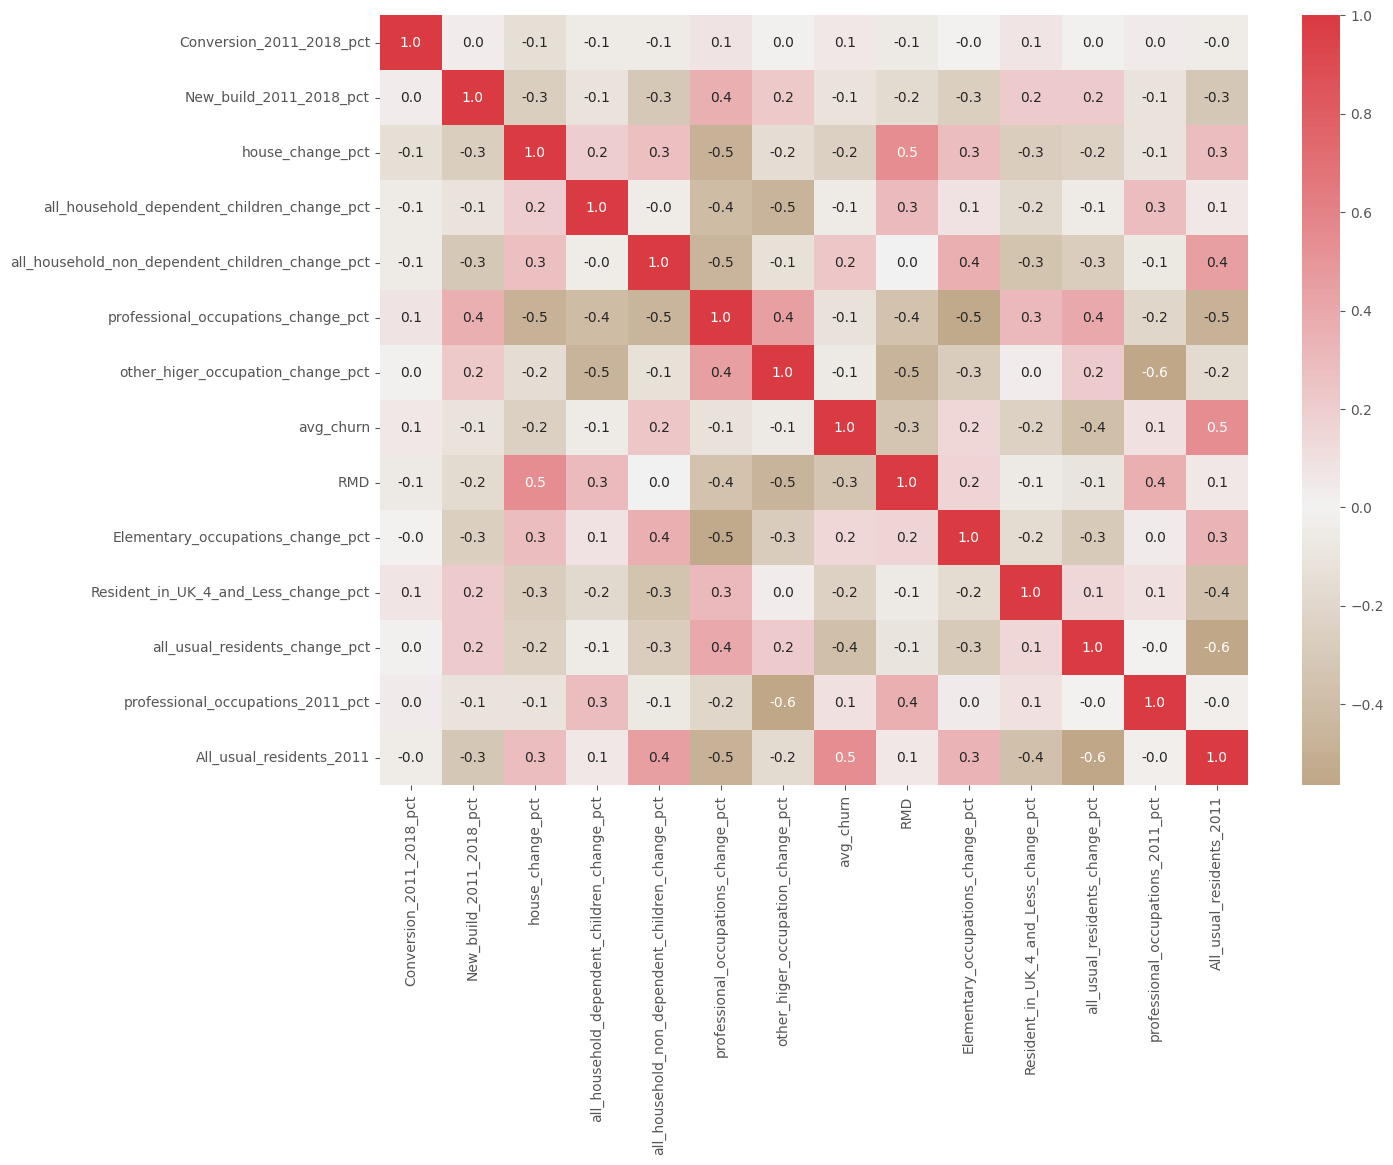

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = sns.diverging_palette(50, 11, as_cmap=True)

ax=sns.heatmap(coefficent.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

# Remove no child

In [35]:
coefficent_scenarios = coefficent.copy()
# coefficent_scenarios = coefficent_scenarios.drop(columns=["household_no_children_change_pct"])

In [36]:
coefficent_scenarios

,Conversion_2011_2018_pct,New_build_2011_2018_pct,house_change_pct,all_household_dependent_children_change_pct,all_household_non_dependent_children_change_pct,professional_occupations_change_pct,other_higer_occupation_change_pct,avg_churn,Elementary_occupations_change_pct,Resident_in_UK_4_and_Less_change_pct,all_usual_residents_change_pct,professional_occupations_2011_pct,All_usual_residents_2011
1,0.165370,0.067093,1.58,-3.91,0.63,1.09,-2.63,0.130000,-0.40,9.78,-0.036212,29.04,0.000760
2,0.135594,0.000000,-0.12,-3.03,0.72,3.01,-0.79,0.150000,-0.74,2.75,0.198366,21.17,0.000712
44,0.000000,0.000000,6.68,-5.64,-1.08,8.05,6.25,0.070000,-0.81,3.20,-0.425013,2.96,0.001020
116,0.000458,0.000068,29.47,-10.77,7.72,3.23,0.35,0.140000,-0.72,-2.30,0.050416,6.06,0.001144
129,0.006413,0.000135,24.51,2.20,0.98,2.18,-1.66,0.170000,-1.51,-0.65,-0.029391,12.46,0.000756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,0.000000,0.233172,-2.26,-1.02,-5.96,7.78,0.28,0.139113,-4.03,24.35,0.619335,6.70,0.000636
4984,0.059094,0.000607,4.70,1.96,2.56,3.38,-6.98,0.310000,0.06,-5.64,-0.187220,13.35,0.001300
4985,0.032066,0.000844,20.29,-2.61,2.08,4.37,-4.21,0.270000,-0.38,-3.88,-0.319894,10.94,0.001601
4989,0.019240,0.000439,20.11,6.82,3.74,1.63,-2.90,0.250000,-0.39,2.18,-0.177714,7.17,0.001652


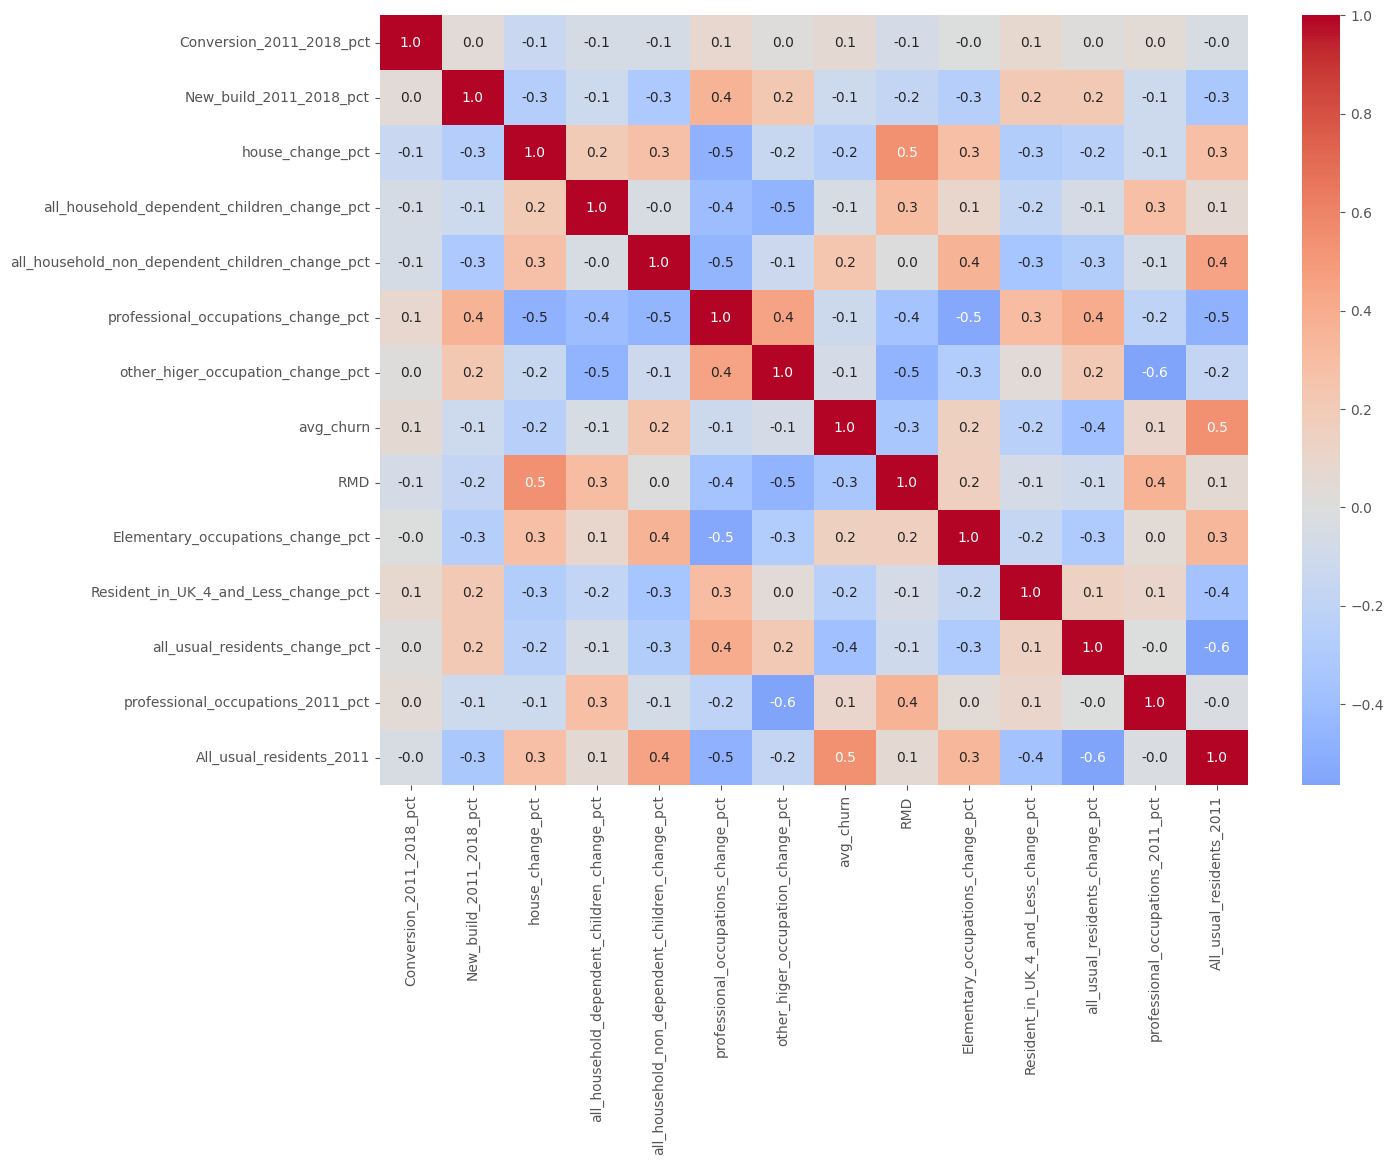

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = "coolwarm"

ax=sns.heatmap(coefficent_scenarios.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

## Analyze the relationship between variables

### Using coefficent_scenarios

In [31]:
num_row = 3
num_col = 5

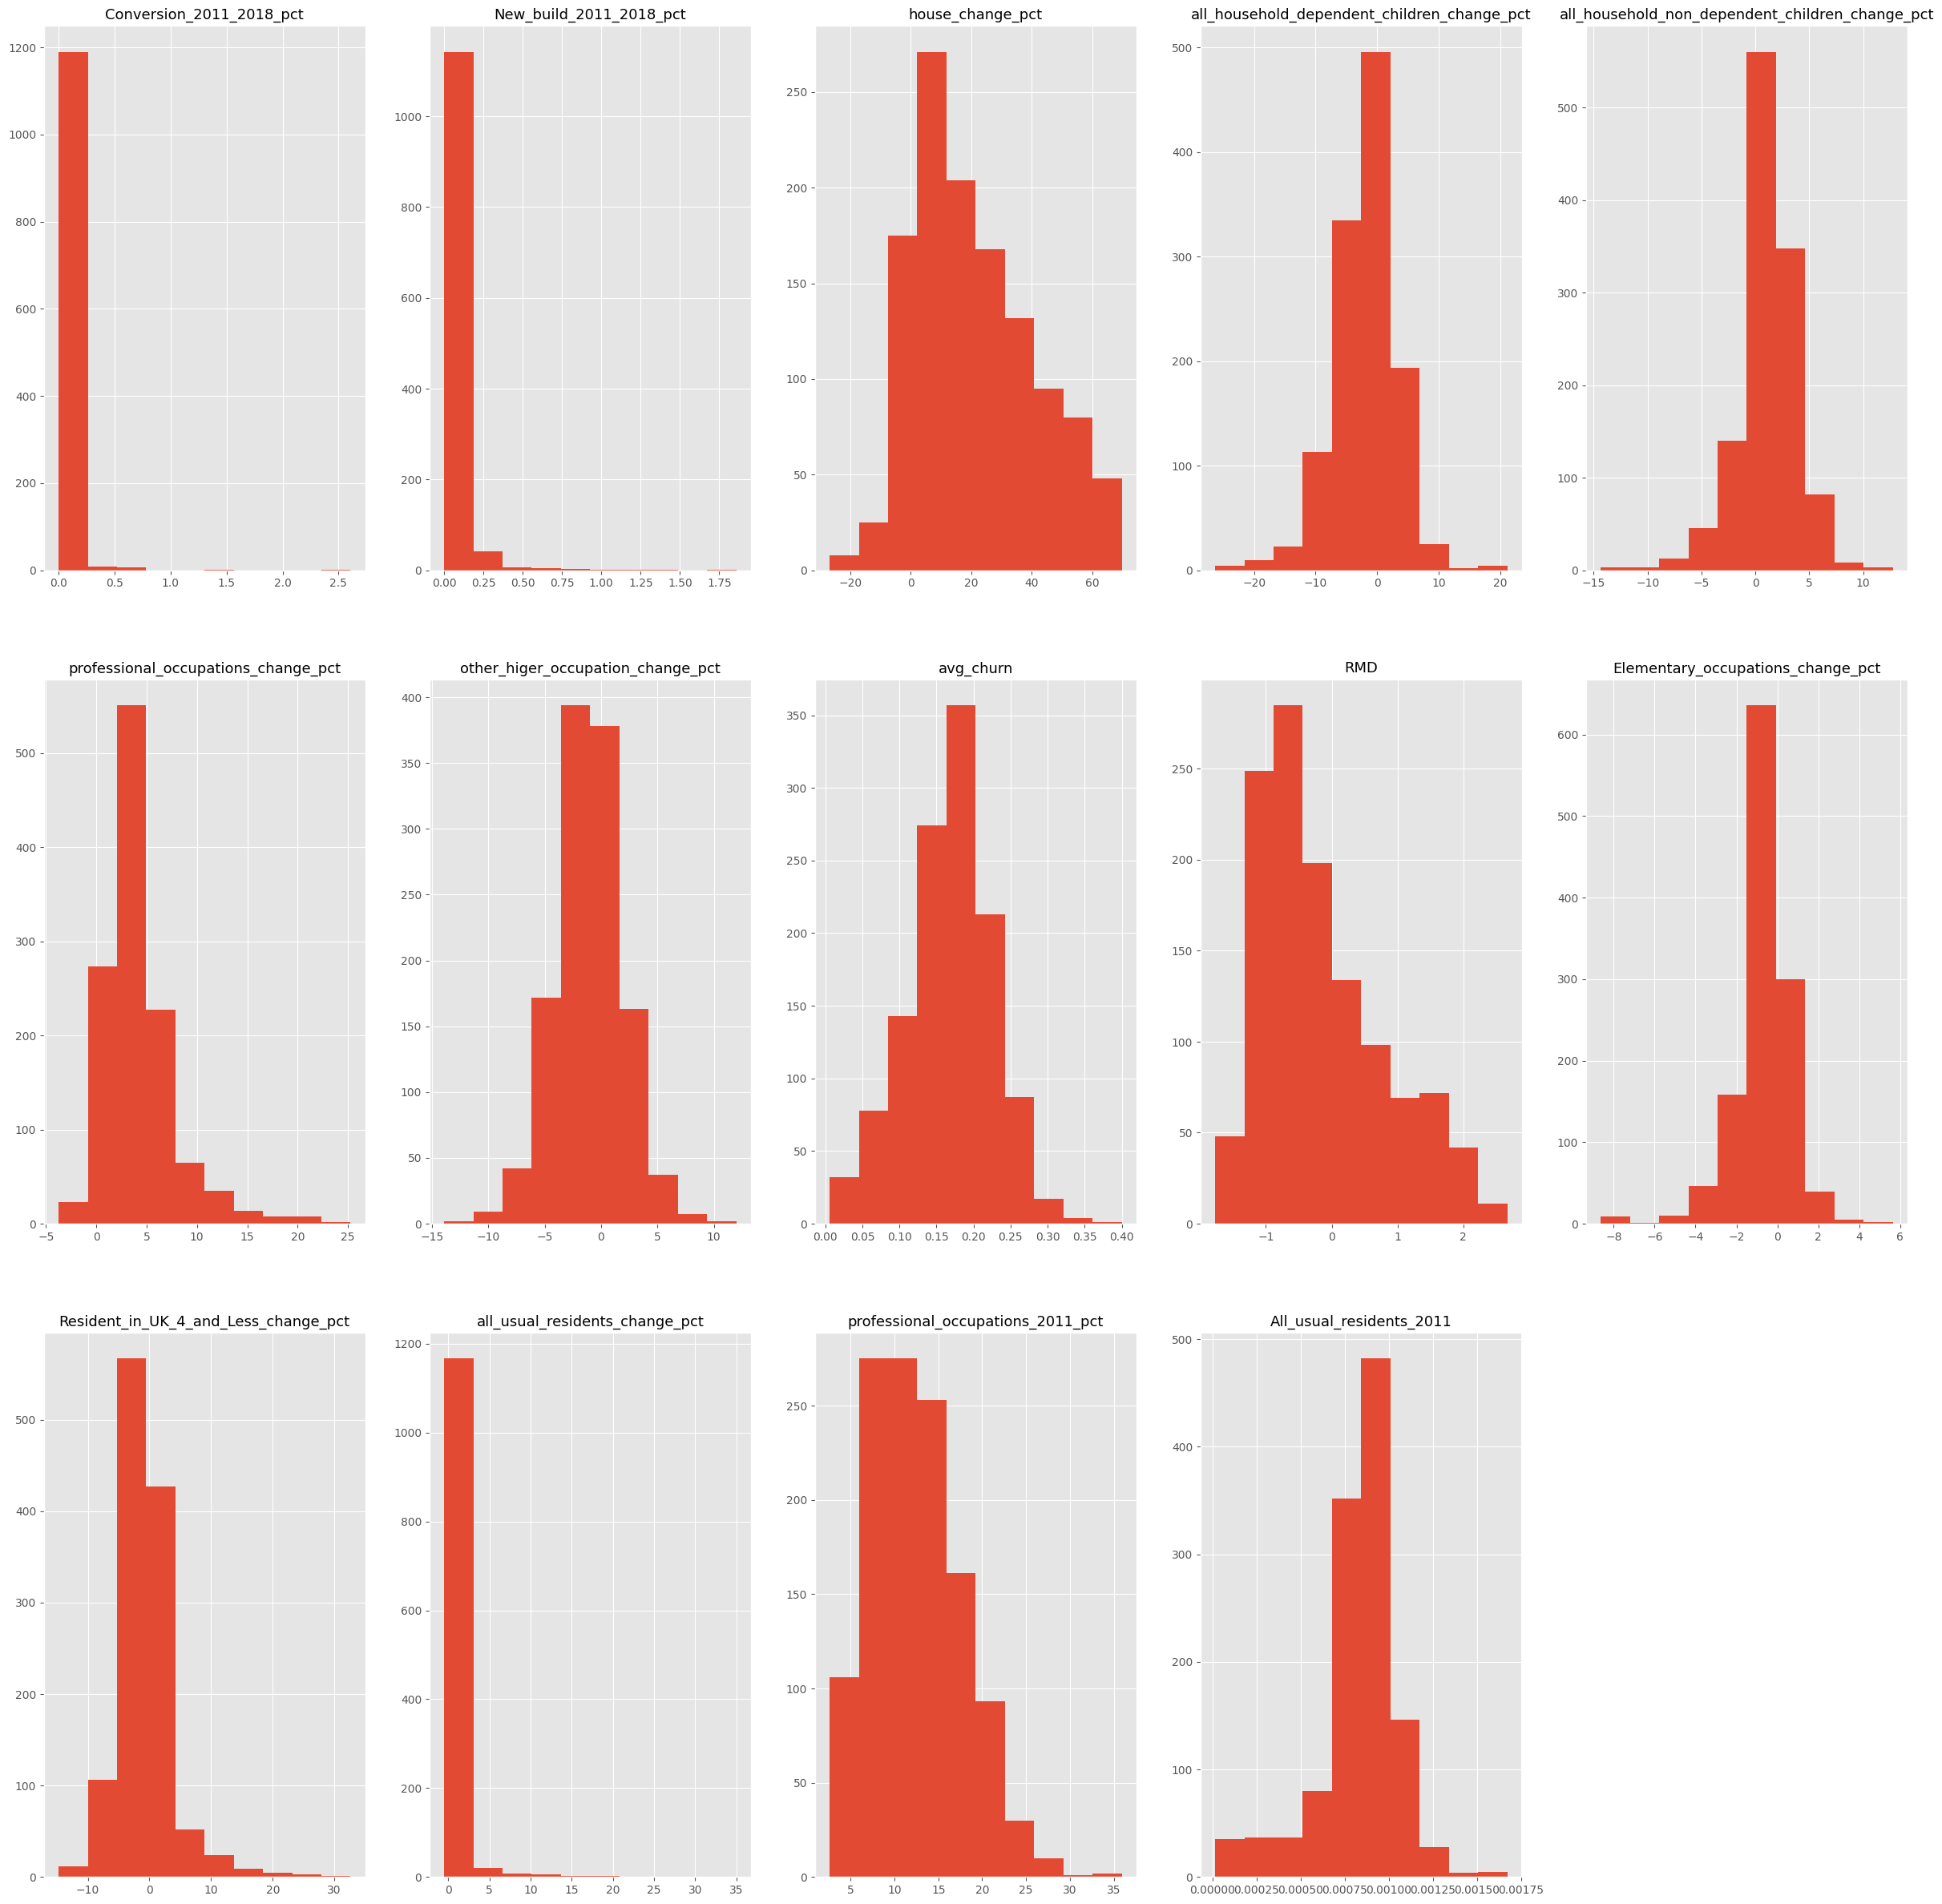

In [32]:
fig, axes = plt.subplots(nrows=num_row, ncols=num_col, figsize=(30, 30))

counter = 0
for i in range(num_row):
    for j in range(num_col):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(coefficent_scenarios.columns):

            ax.hist(coefficent_scenarios[coefficent_scenarios.columns[counter]], label='{}'.format(coefficent_scenarios.columns[counter]))
            ax.set_title(coefficent_scenarios.columns[counter], fontsize=13)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()
        
# to output high-resolution image - uncomment the next line
# plt.savefig('Cluster_1_hist.png', dpi = 100)

### Box-Cox Transformation

In [41]:
boxcox_secenrio_data = coefficent_scenarios.copy()

for col in boxcox_secenrio_data.columns:
    shift = abs(min(boxcox_secenrio_data[col])) + 1  # Make all data positive
    boxcox_secenrio_data[col], _ = stats.boxcox(boxcox_secenrio_data[col] + shift)

len(boxcox_secenrio_data)

1206

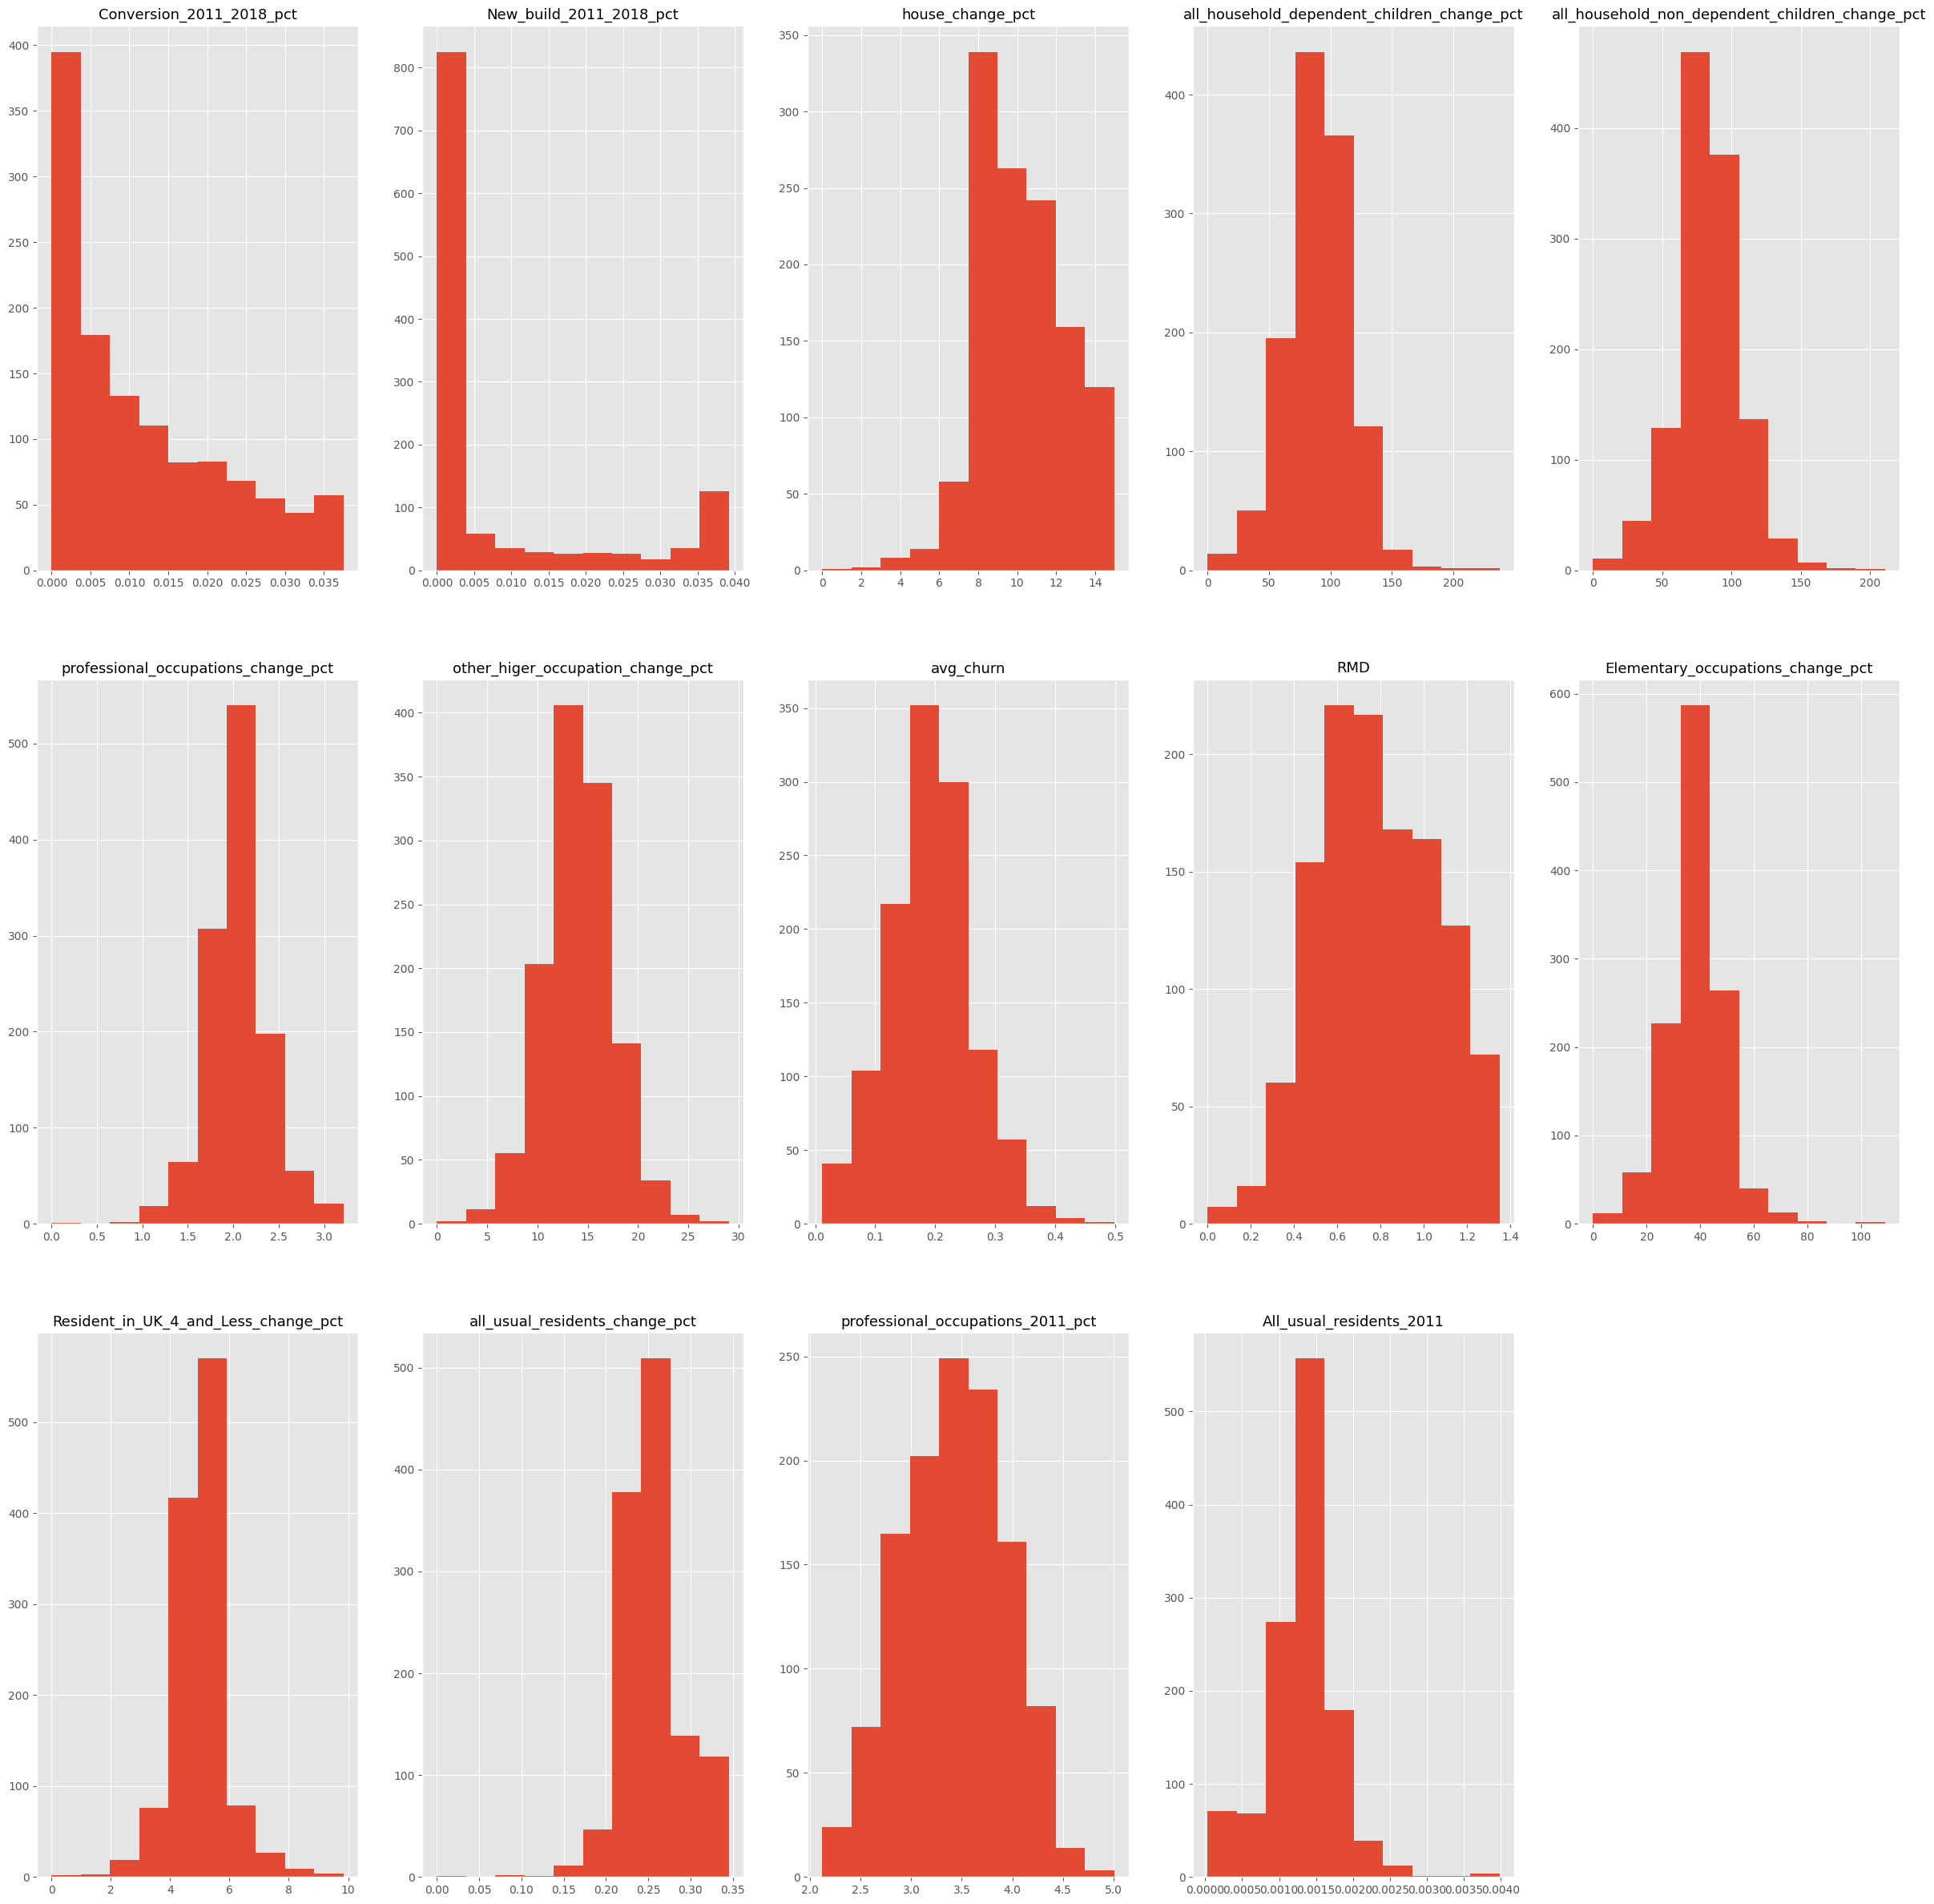

In [42]:
fig, axes = plt.subplots(nrows=num_row, ncols=num_col, figsize=(30, 30))

counter = 0
for i in range(num_row):
    for j in range(num_col):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(boxcox_secenrio_data.columns):

            ax.hist(boxcox_secenrio_data[boxcox_secenrio_data.columns[counter]], label='{}'.format(boxcox_secenrio_data.columns[counter]))
            ax.set_title(boxcox_secenrio_data.columns[counter], fontsize=13)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()

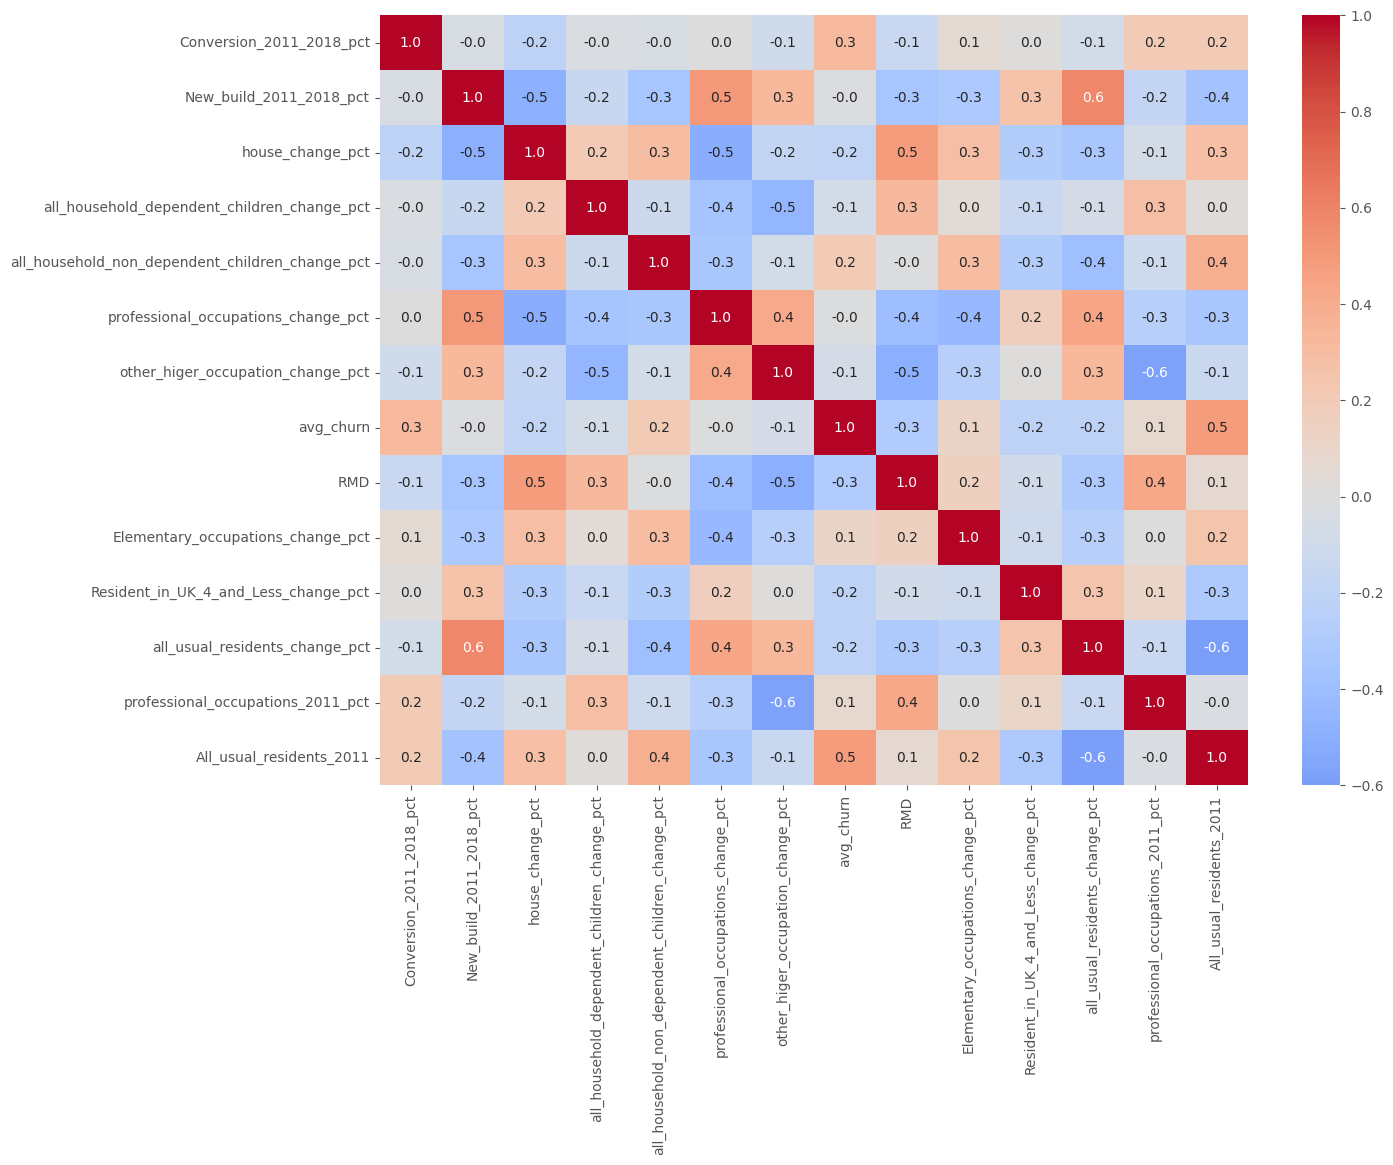

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = "coolwarm"

ax=sns.heatmap(boxcox_secenrio_data.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

### Yeo-Johnson Transformation

In [44]:

yeojohnson_secenrio_data = coefficent_scenarios.copy()

for col in yeojohnson_secenrio_data.columns:
    yeojohnson_secenrio_data[col], _ = stats.yeojohnson(yeojohnson_secenrio_data[col])

len(yeojohnson_secenrio_data)

1206

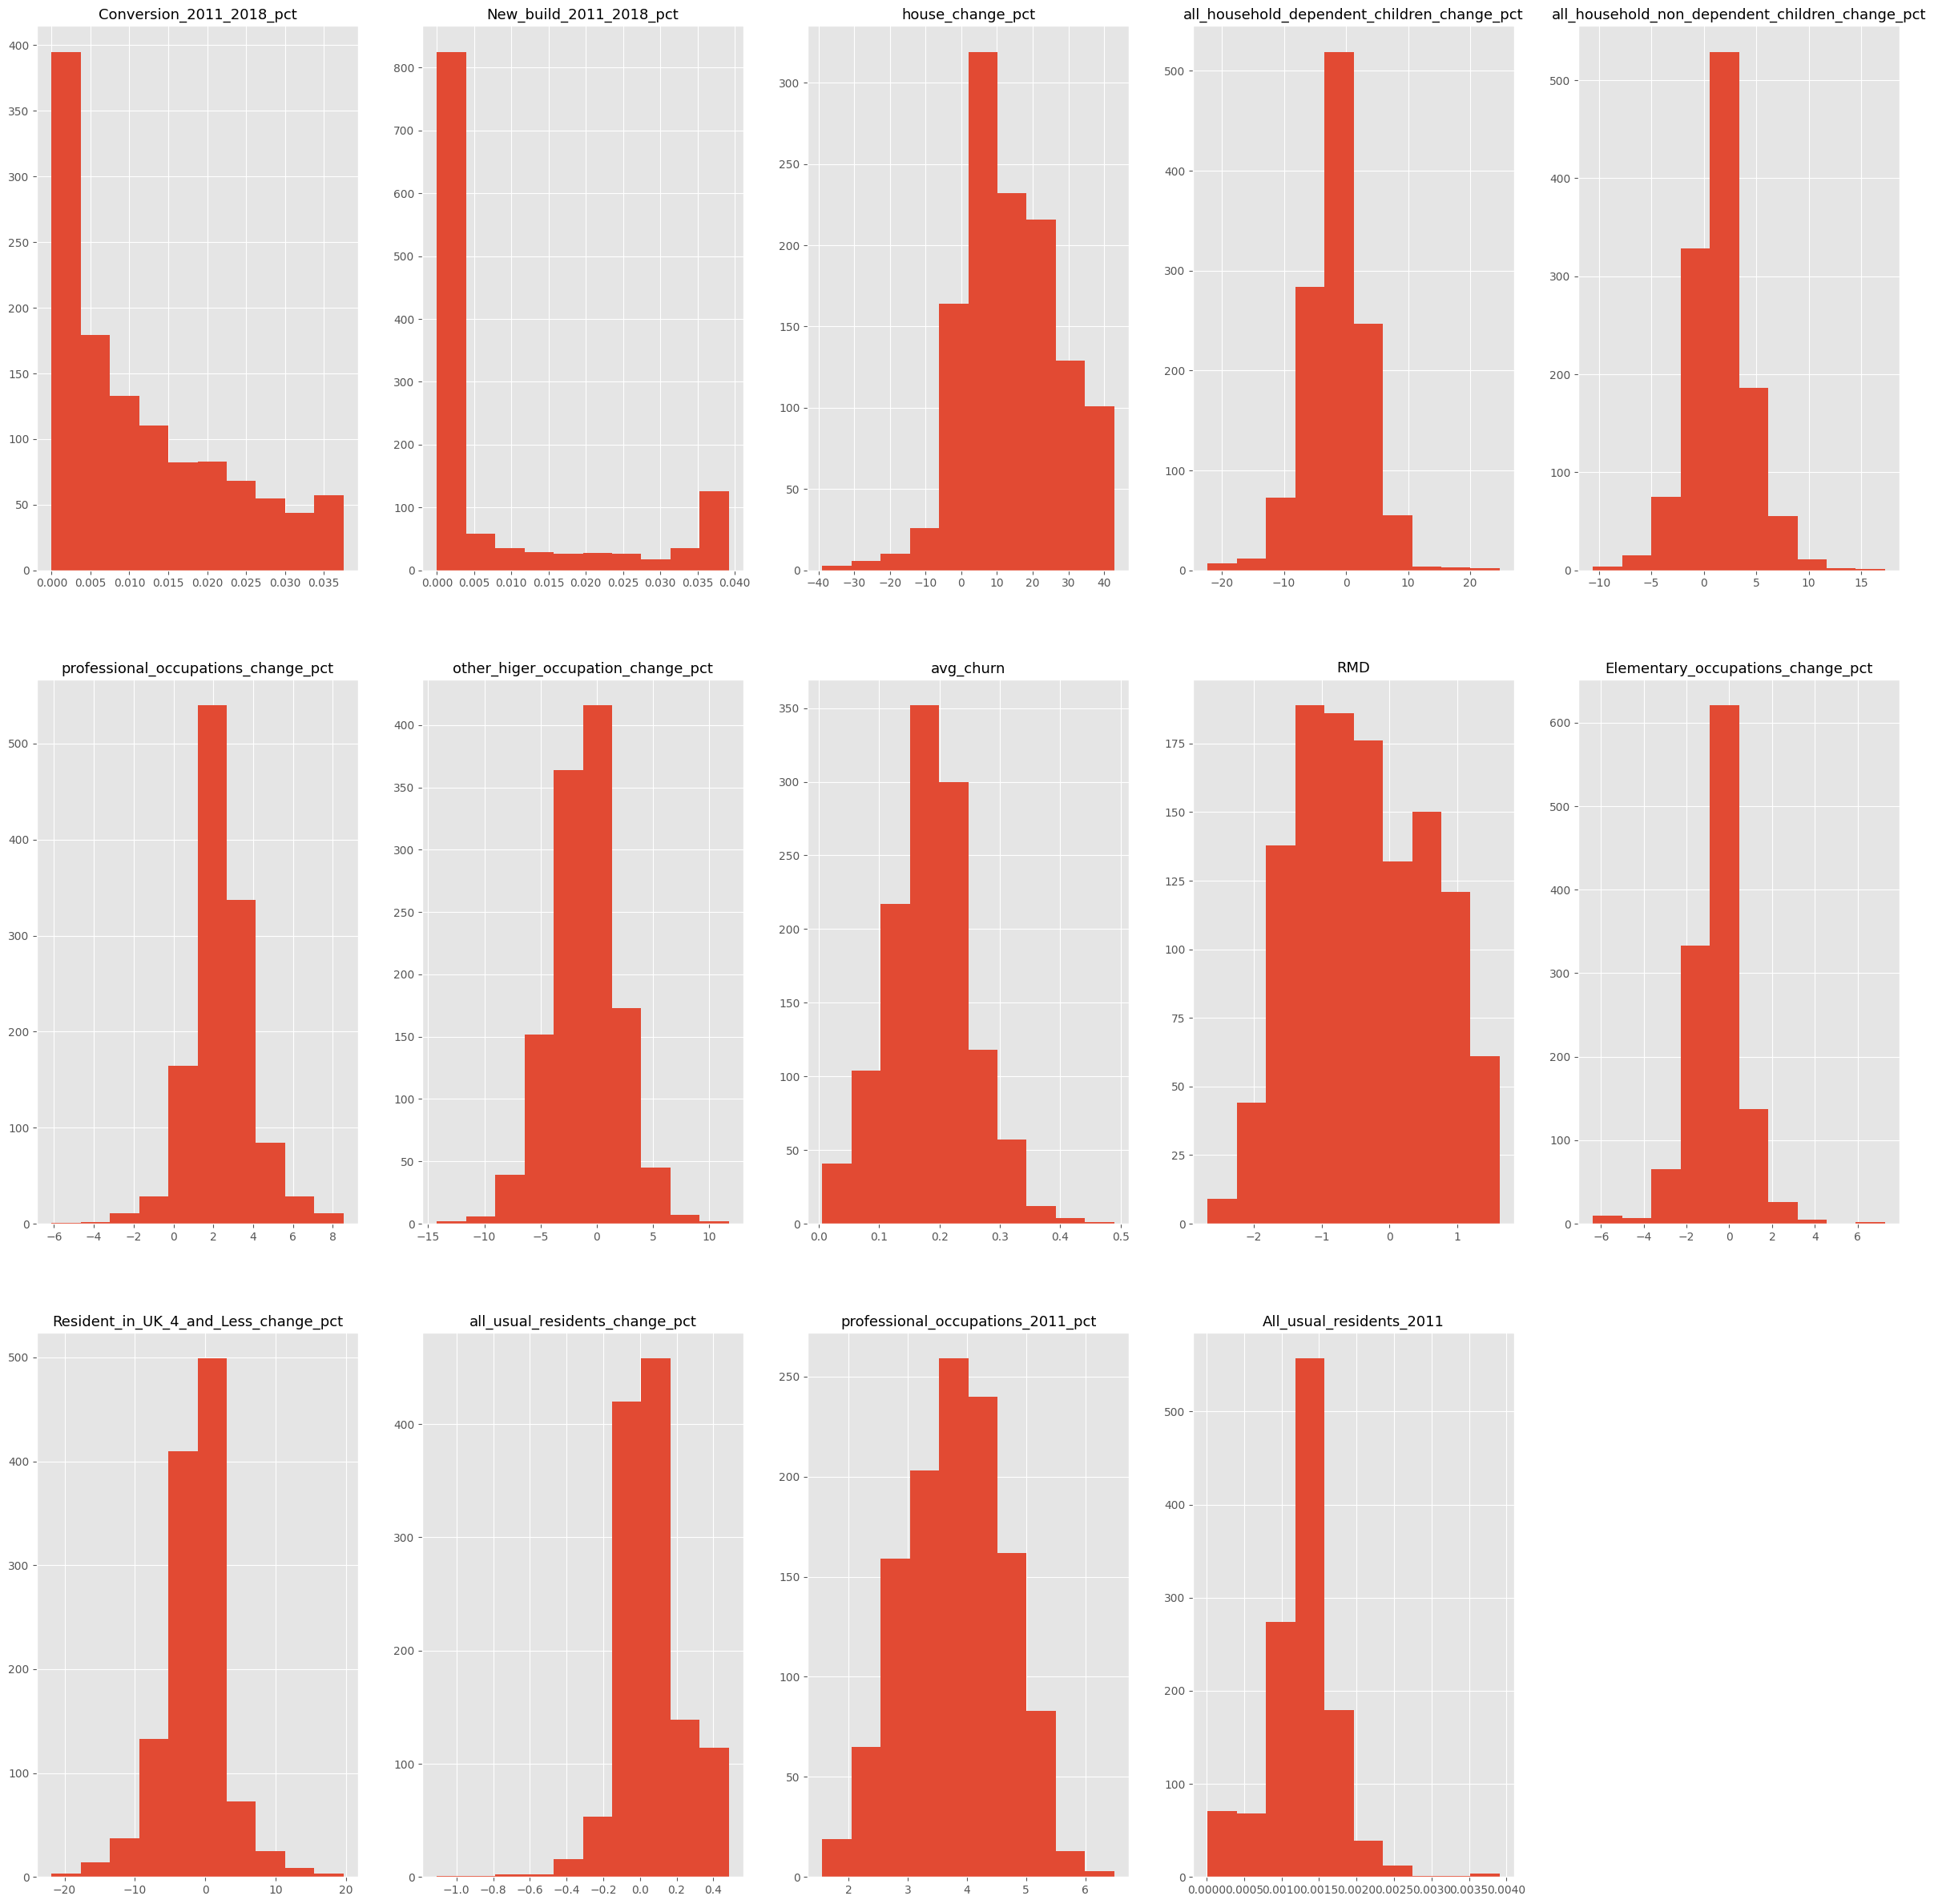

In [45]:
fig, axes = plt.subplots(nrows= num_row, ncols= num_col, figsize=(30, 30))

counter = 0
for i in range(num_row):
    for j in range(num_col):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(yeojohnson_secenrio_data.columns):

            ax.hist(yeojohnson_secenrio_data[yeojohnson_secenrio_data.columns[counter]], label='{}'.format(yeojohnson_secenrio_data.columns[counter]))
            ax.set_title(yeojohnson_secenrio_data.columns[counter], fontsize=13)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1
        
plt.show()

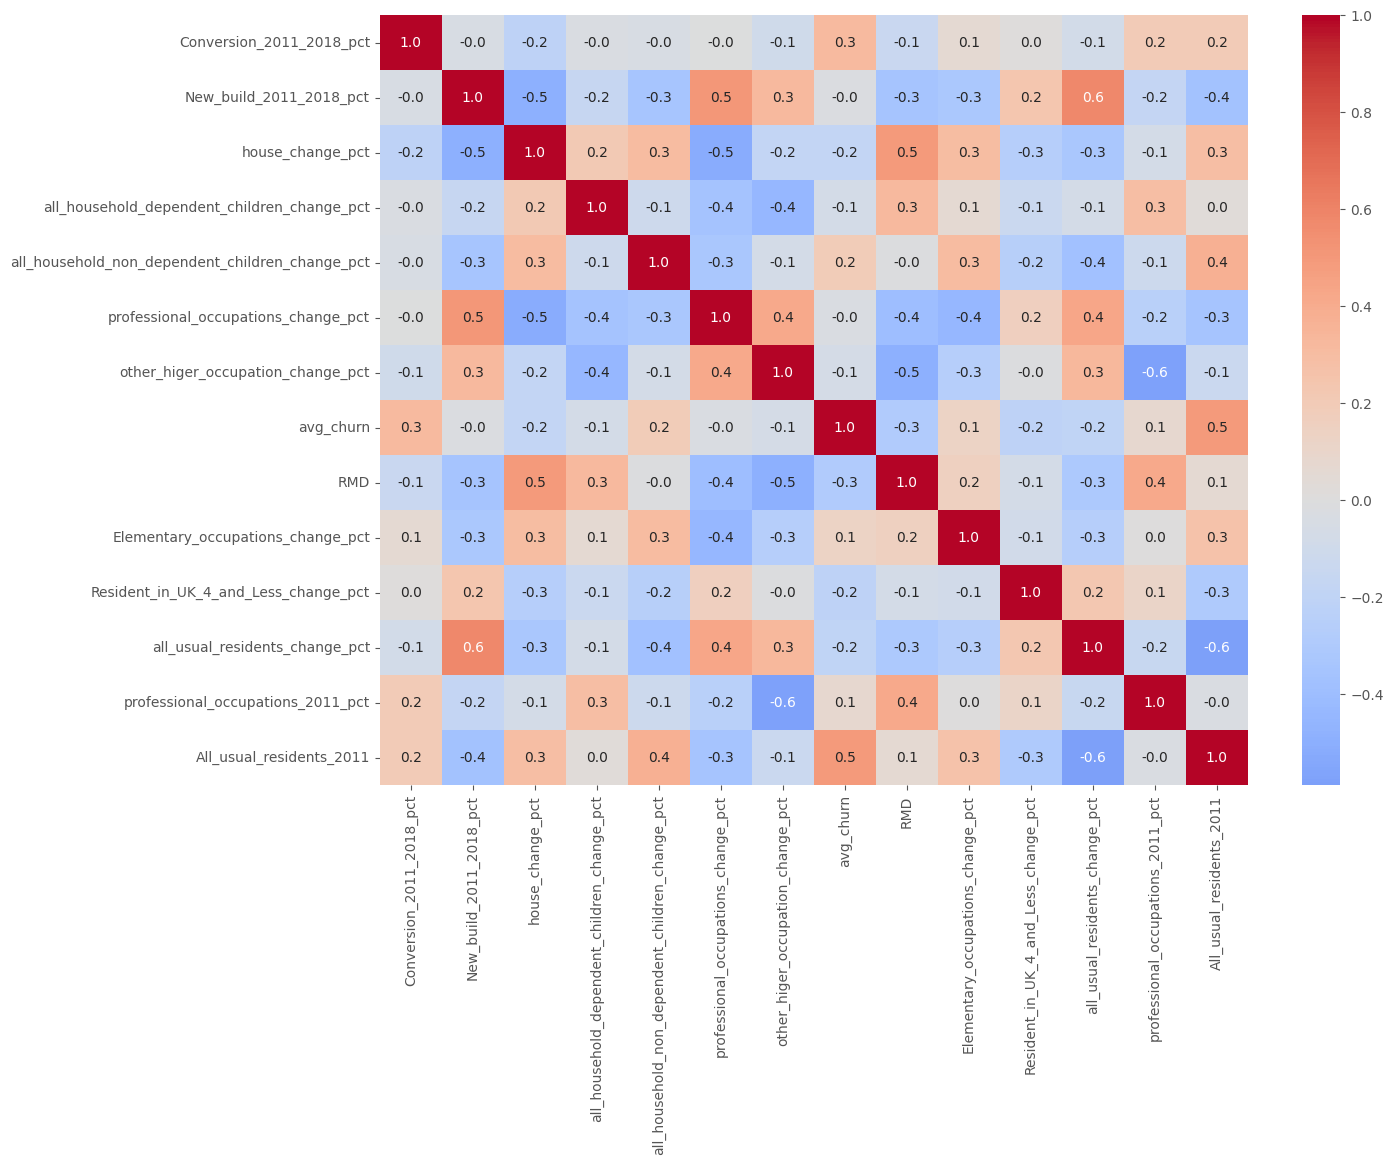

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
cmap = "coolwarm"

ax=sns.heatmap(yeojohnson_secenrio_data.corr(), cmap=cmap, center=0, annot=True, fmt=".1f")

## Check number of clusters

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4704142639906536
For n_clusters = 3 The average silhouette_score is : 0.3589325732416977


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.33599932940320326
For n_clusters = 5 The average silhouette_score is : 0.2677872453860595


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.2444266476149905


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.22479500908498742


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.22225030058636303


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.20775819131298778


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.2090170229826163


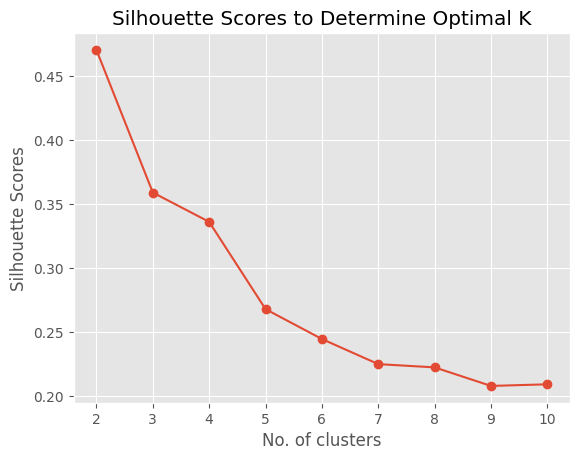

In [47]:
# check and plot silhouette scores to determine the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
coefficent_scenarios= coefficent_scenarios.fillna(0)

silhouette_scores = []
range_n_clusters = [2, 3, 4, 5 , 6 , 7, 8, 9, 10]
Sum_of_squared_distances = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state= 0 )
    cluster_labels = clusterer.fit_predict(coefficent_scenarios)
    Sum_of_squared_distances.append(clusterer.inertia_)
    
    silhouette_avg = silhouette_score(coefficent_scenarios, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
plt.plot(range_n_clusters, silhouette_scores, 'o-')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores to Determine Optimal K')
plt.show()

## Noralisastion + clustrting function

In [48]:
# check and plot silhouette scores to determine the optimal number of clusters

def clustering_comparison(data_list, normalisation_strategy, range_min = 25.0, range_max = 75.0, num_clusters = 3):
    # normalisation
    # data_list = [secenrio_data_decile, log_secenrio_data_decile, cbrt_secenrio_data_decile, boxcox_secenrio_data_decile, yeojohnson_secenrio_data_decile]
    if normalisation_strategy == "RobustScaler": # if decile, min:10.0, max:90.0
        secenrio_data            = pd.DataFrame(RobustScaler(quantile_range=(range_min, range_max)).fit_transform(data_list[0]), index=data_list[0].index, columns=data_list[0].columns)
        log_secenrio_data        = pd.DataFrame(RobustScaler(quantile_range=(range_min, range_max)).fit_transform(data_list[1]), index=data_list[1].index, columns=data_list[1].columns)
        cbrt_secenrio_data       = pd.DataFrame(RobustScaler(quantile_range=(range_min, range_max)).fit_transform(data_list[2]), index=data_list[2].index, columns=data_list[2].columns)
        boxcox_secenrio_data     = pd.DataFrame(RobustScaler(quantile_range=(range_min, range_max)).fit_transform(data_list[3]), index=data_list[3].index, columns=data_list[3].columns)
        yeojohnson_secenrio_data = pd.DataFrame(RobustScaler(quantile_range=(range_min, range_max)).fit_transform(data_list[4]), index=data_list[4].index, columns=data_list[4].columns)

    elif normalisation_strategy == "zscore":
        secenrio_data            = data_list[0].apply(zscore)
        log_secenrio_data        = data_list[1].apply(zscore)
        cbrt_secenrio_data       = data_list[2].apply(zscore)
        boxcox_secenrio_data     = data_list[3].apply(zscore)
        yeojohnson_secenrio_data = data_list[4].apply(zscore)


    # creating empty array to hold the performance measure for each cluster derived from individual dataset permutation
    permutation = ["secenrio_data", "log_secenrio_data", "cbrt_secenrio_data", "boxcox_secenrio_data", "yeojohnson_secenrio_data"]
    calinski_harabasz_scores = []

    secenrio_data = secenrio_data.fillna(0)
    secenrio_data_kmeans = KMeans(n_clusters= num_clusters, random_state=0).fit(secenrio_data)
    secenrio_data_labels = secenrio_data_kmeans.labels_
    # Corresponding the label to the original data
    secenrio_data["cluster"] = secenrio_data_labels
    calinski_harabasz_scores.append(calinski_harabasz_score(secenrio_data, secenrio_data_labels))
 
    log_secenrio_data= log_secenrio_data.fillna(0)
    log_secenrio_data_kmeans = KMeans(n_clusters= num_clusters, random_state=0).fit(log_secenrio_data)
    log_secenrio_data_labels = log_secenrio_data_kmeans.labels_
    # Corresponding the label to the original data
    log_secenrio_data["cluster"] = log_secenrio_data_labels
    calinski_harabasz_scores.append(calinski_harabasz_score(log_secenrio_data, log_secenrio_data_labels))

    cbrt_secenrio_data= cbrt_secenrio_data.fillna(0)
    cbrt_secenrio_data_kmeans = KMeans(n_clusters= num_clusters, random_state=0).fit(cbrt_secenrio_data)
    cbrt_secenrio_data_labels = cbrt_secenrio_data_kmeans.labels_
    # Corresponding the label to the original data
    cbrt_secenrio_data["cluster"] = cbrt_secenrio_data_labels
    calinski_harabasz_scores.append(calinski_harabasz_score(cbrt_secenrio_data, cbrt_secenrio_data_labels))

    boxcox_secenrio_data= boxcox_secenrio_data.fillna(0)
    boxcox_secenrio_data_kmeans = KMeans(n_clusters= num_clusters, random_state=0).fit(boxcox_secenrio_data)
    boxcox_secenrio_data_labels = boxcox_secenrio_data_kmeans.labels_
    # Corresponding the label to the original data
    boxcox_secenrio_data["cluster"] = boxcox_secenrio_data_labels
    calinski_harabasz_scores.append(calinski_harabasz_score(boxcox_secenrio_data, boxcox_secenrio_data_labels))
 
    yeojohnson_secenrio_data= yeojohnson_secenrio_data.fillna(0)
    yeojohnson_secenrio_data_kmeans = KMeans(n_clusters= num_clusters, random_state=0).fit(yeojohnson_secenrio_data)
    yeojohnson_secenrio_data_labels = yeojohnson_secenrio_data_kmeans.labels_
    # Corresponding the label to the original data
    yeojohnson_secenrio_data["cluster"] = yeojohnson_secenrio_data_labels
    calinski_harabasz_scores.append(calinski_harabasz_score(yeojohnson_secenrio_data, yeojohnson_secenrio_data_labels))
   
    print(metrics.calinski_harabasz_score(secenrio_data, secenrio_data_labels))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(secenrio_data, secenrio_data_labels))

    print(metrics.calinski_harabasz_score(log_secenrio_data, log_secenrio_data_labels))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(log_secenrio_data, log_secenrio_data_labels))

    print(metrics.calinski_harabasz_score(cbrt_secenrio_data, cbrt_secenrio_data_labels))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(cbrt_secenrio_data, cbrt_secenrio_data_labels))

    print(metrics.calinski_harabasz_score(boxcox_secenrio_data, boxcox_secenrio_data_labels))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(boxcox_secenrio_data, boxcox_secenrio_data_labels))

    print(metrics.calinski_harabasz_score(yeojohnson_secenrio_data, yeojohnson_secenrio_data_labels))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(yeojohnson_secenrio_data, yeojohnson_secenrio_data_labels))

    return calinski_harabasz_scores



In [49]:
data_list = [coefficent_scenarios, boxcox_secenrio_data, yeojohnson_secenrio_data]

In [50]:
result_list_decile = clustering_comparison(data_list, "RobustScaler",10.0,90.0,4)


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


606.7238892195604
393.6438930579255
428.9318960223064
586.112918659928
467.92474736942773


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
result_list_zscore = clustering_comparison(data_list, "zscore" , num_clusters = 4)

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


268.2207912173121
383.6810144593641
304.9649974070957
289.76830080590975
285.199357596299


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Clustring plot - RobustScaler

In [53]:
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/
# plot the 1st cluster

from math import pi

def  plot_cluster(radar_name, radar_avg, title_label,y_size = (-1, 1), num_col = 0):
# Reference for code: https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

    fig, ax = plt.subplots()
    fig.set_size_inches(14, 10)

    # number of variable
    categories=list(radar_name)[1:]
    N = len(categories)
    
    # plotting for 1st variable
    values=radar_name.iloc[0,1:].values.flatten().tolist()
    values += values[:1]
    values

    # ------- PART 1: Create background
    
    # number of variable
    categories=list(radar_name)[1:]
    N = len(categories)
    
    # angles for plotting
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, size = 9)
    
    # Draw ylabels
    plt.ylim(y_size)

    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    
    # Ind1
    values=radar_name.iloc[num_col,1:].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1.5, linestyle='dashdot', marker="o", label= title_label)
    ax.fill(angles, values, 'b', alpha=0.1)
    
    # Ind2
    values=radar_avg.iloc[:,1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle=':', label="Averge")
    ax.fill(angles, values, 'r', alpha=0.05)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    return  fig, ax

In [54]:
def robust(dataframe, range_min = 25.0, range_max = 75.0):
        robust_data = pd.DataFrame(RobustScaler(quantile_range=(range_min, range_max)).fit_transform(dataframe), index=dataframe.index, columns=dataframe.columns)
        return robust_data

In [55]:
def robust_declie(dataframe, range_min = 10.0, range_max = 90.0):
        robust_data = pd.DataFrame(RobustScaler(quantile_range=(range_min, range_max)).fit_transform(dataframe), index=dataframe.index, columns=dataframe.columns)
        return robust_data

In [56]:
coefficent_scenarios_decile = robust_declie(coefficent_scenarios, 10.0, 90.0)
boxcox_secenrio_data_decile = robust_declie(boxcox_secenrio_data, 10.0, 90.0)
yeojohnson_secenrio_data_decile = robust_declie(yeojohnson_secenrio_data, 10.0, 90.0)

In [57]:
normalied_data_robust = boxcox_secenrio_data_decile
data_name_robust = "boxcox_secenrio_data_decile"
kmeans_lable_robust = data_name_robust + "_labels"
radar_data_robust = "radar" + data_name_robust
radar_avg_robust = "radar_avg" + data_name_robust

kmeans_name_robust = data_name_robust + "_kmeans"

In [58]:
normalied_data_robust = normalied_data_robust.fillna(0)
kmeans_name_robust = KMeans(n_clusters= 4, random_state=0).fit(normalied_data_robust)
kmeans_lable_robust = kmeans_name_robust.labels_
# Corresponding the label to the original data
normalied_data_robust["cluste_robust"] = kmeans_lable_robust

/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
radar_data_robust = normalied_data_robust.groupby("cluste_robust").mean().reset_index()
print(normalied_data_robust.groupby("cluste_robust").size())

cluste_robust
0    359
1    157
2    333
3    357
dtype: int64


In [60]:
# cluste_robust
# 0    359
# 1    157
# 2    333
# 3    357
# dtype: int64

In [61]:
radar_avg_robust = normalied_data_robust.drop(columns = ["cluste_robust"]).mean().reset_index()
radar_avg_robust = radar_avg_robust.rename(columns={"index":"var", 0: "value"})

In [63]:
radar_avg_robust

,var,value
0,Conversion_2011_2018_pct,0.104569
1,New_build_2011_2018_pct,0.207267
2,house_change_pct,0.042691
3,all_household_dependent_children_change_pct,-0.015167
4,all_household_non_dependent_children_change_pct,0.010251
5,professional_occupations_change_pct,0.012971
6,other_higer_occupation_change_pct,-0.000531
7,avg_churn,0.006941
8,RMD,0.016908
9,Elementary_occupations_change_pct,-0.004876


### Plot the clusters

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_3057/3281624026.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


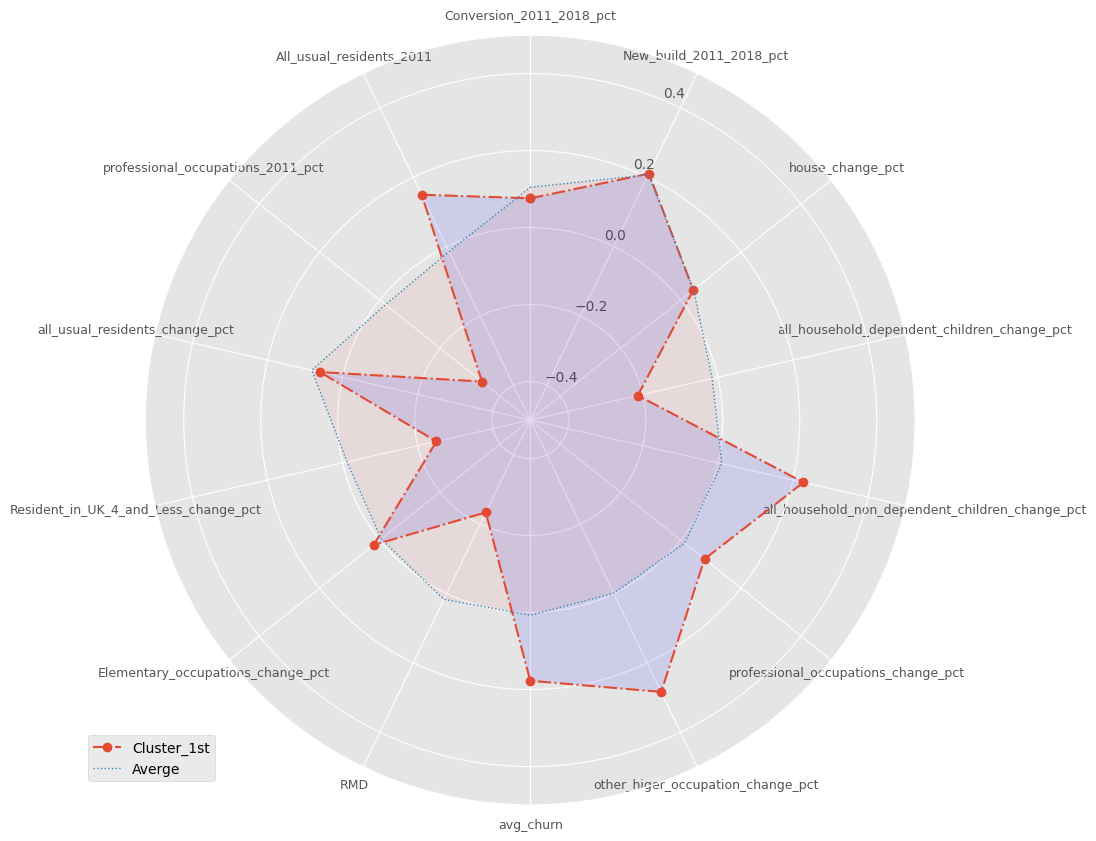

In [64]:
log_secenrio_data_robust_cluster_1st = plot_cluster(radar_data_robust, radar_avg_robust, "Cluster_1st", (-0.5, 0.5), 0)

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_3057/3281624026.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


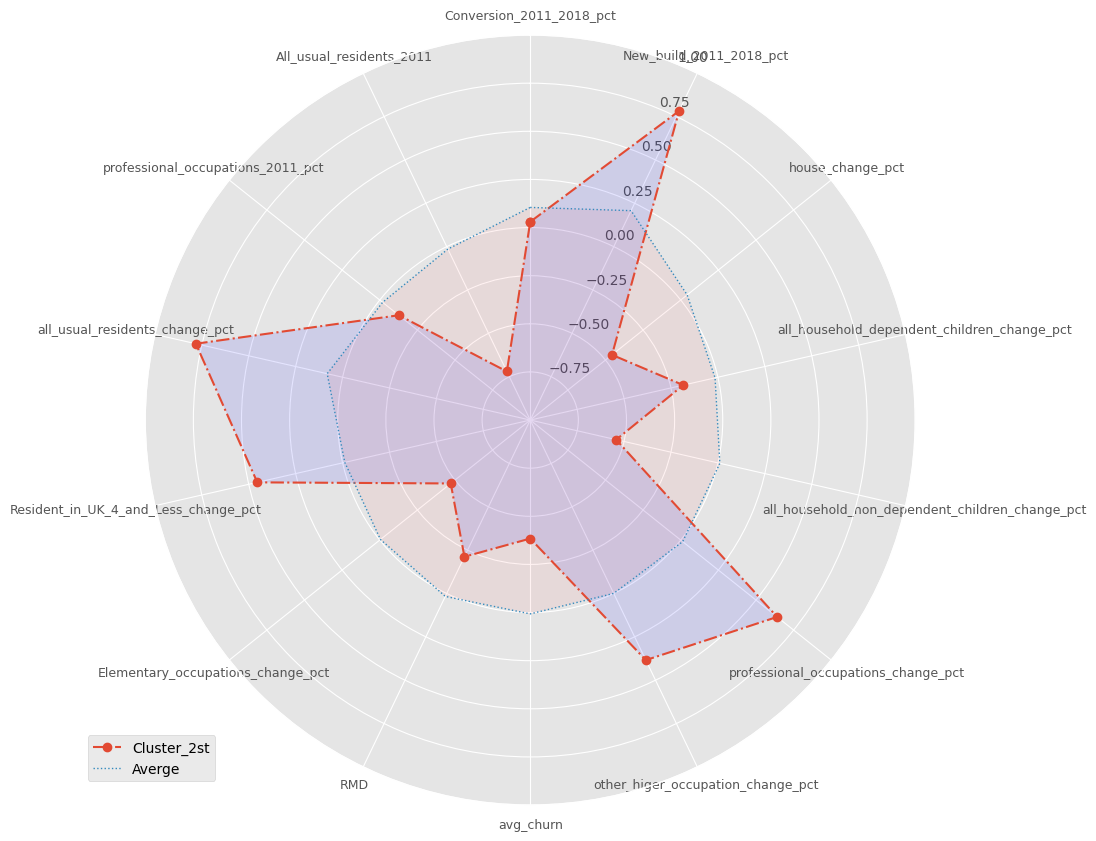

In [65]:

log_secenrio_data_robust_cluster_3st = plot_cluster(radar_data_robust, radar_avg_robust, "Cluster_2st", (-1, 1), 1)

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_3057/3281624026.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


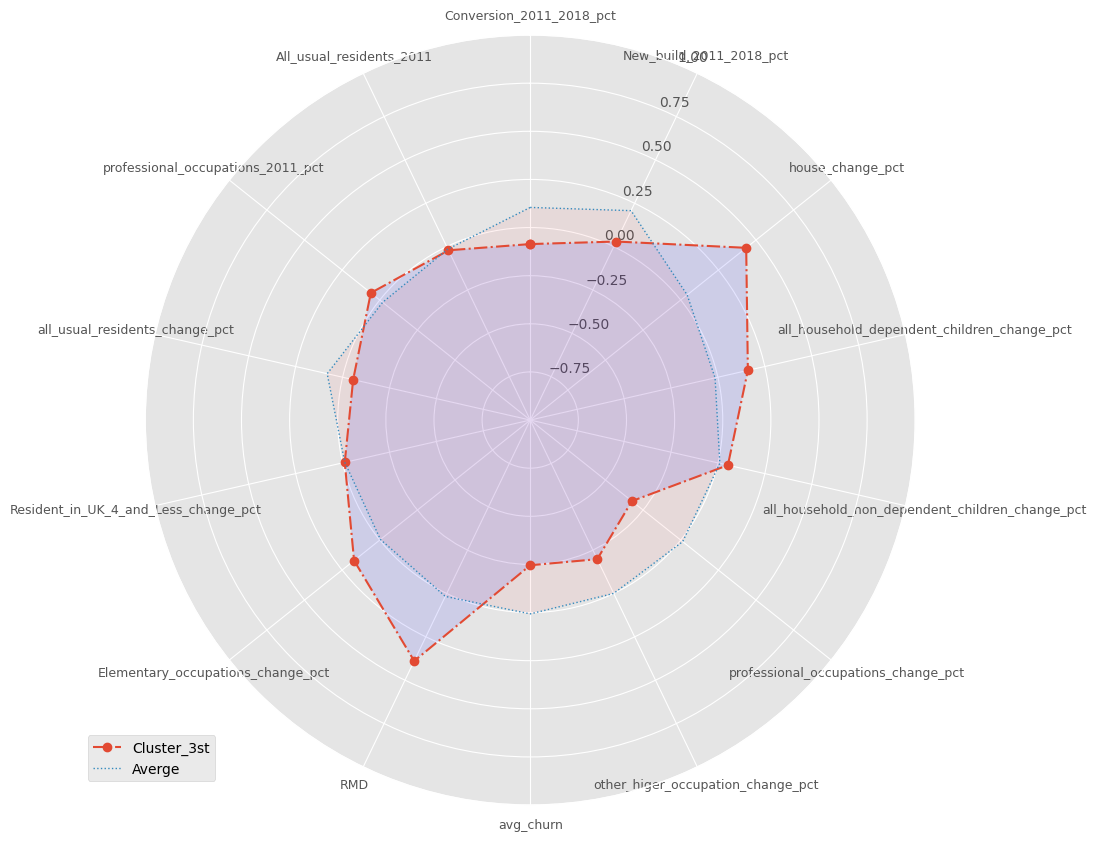

In [66]:

log_secenrio_data_robust_cluster_3st = plot_cluster(radar_data_robust, radar_avg_robust, "Cluster_3st", (-1,1), 2)

/var/folders/rr/9mckj0xn5jv_p1y1j15mbncm0000gn/T/ipykernel_3057/3281624026.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, polar=True)


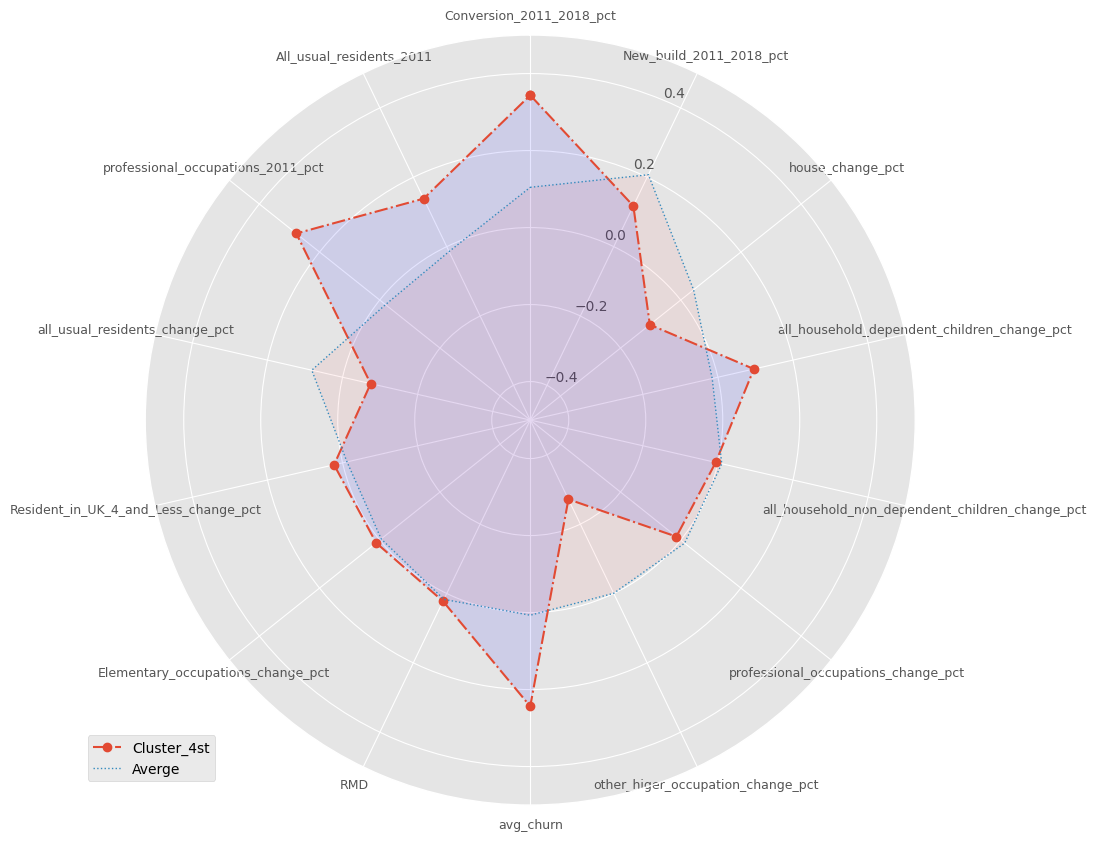

In [77]:
log_secenrio_data_robust_cluster_4st = plot_cluster(radar_data_robust, radar_avg_robust, "Cluster_4st", (-0.5, 0.5), 3)

In [68]:
# log_secenrio_data_robust_cluster_5st = plot_cluster(radar_data_robust, radar_avg_robust, "Cluster_5st", (-1,1), 4)

In [69]:
mapping_cluster = {0: 'cluster1', 1: 'cluster2', 2: 'cluster3', 3: 'cluster4'}
mapping_type = {0: 'gen', 1: 'renew', 2: 'potential gen', 3: "gen"}

normalied_data_robust_export = normalied_data_robust.copy()
normalied_data_robust_export["LSOA21CD"] = classifed_neibor_change["LSOA21CD"]

normalied_data_robust_export["classification_robust"] = normalied_data_robust_export['cluste_robust'].map(mapping_type)
normalied_data_robust_export['classification_cluster_robust'] = normalied_data_robust_export['cluste_robust'].map(mapping_cluster)


In [6]:
borough_data = pd.read_csv("data/borough_lsoa.csv")

In [72]:
normalied_data_robust_export = normalied_data_robust_export.merge(borough_data, on = "LSOA21CD", how = "left")

In [7]:
output_cluster_path = "data/Output/overlap_PCA"
normalied_data_robust_export.to_csv(output_cluster_path + "/PCA_overlap_part3_1_status_variable_no_no_child.csv")

NameError: name 'normalied_data_robust_export' is not defined

In [75]:
gen_data = normalied_data_robust_export[normalied_data_robust_export["classification_robust"] == "gen"]

In [76]:
gen_data.to_csv(output_cluster_path + "/PCA_overlap_robust_part3_1_status_variable_no_no_child_gen.csv")